In [1]:
import sys
import os
basef = "/mnt/data/Anastasia/"
wdirs = ["/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/",
         basef+"18_12_10_pd3_12_div7_WIS_NR-BeRST",
         basef+"18_12_12_pd7_12_div5_WIS_NR-BeRST",
         basef+"18_12_12_pd7_12_div5_WIS_NR-BeRST_DM590",
         basef+"19_01_30_pd25_01_div5_NR_BeRST",
         basef+"19_02_05_pd1_02_div4_NR_BeRST"
]

dfiles = []
for dirt in wdirs:
    basedir = dirt
    files = os.listdir(basedir)
    if dirt[-1] != '/':
        dirt = dirt+'/'
    for f in files:
        if f[-4:]=='.tif': 
            try:
                i = int(f[-5])
                dfiles.append(dirt+f)
            except:
                pass

            
     
               
  
            
#dfiles = dfiles[4:8]

print(len(dfiles))
print(dfiles)


35
['/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell2_3.tif', '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell1_1.tif', '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell3_5.tif', '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell4_7.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell5_10.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell2_3.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell1_1.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell4_8.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell7_14.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell6_12.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell3_5.tif', '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell1_1.tif', '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell3_7.tif', '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell2_4.tif', '/mnt/data/Anastasia/18_12_12_p

In [2]:
sys.path.append("/export/home1/users/bssn/serna/GitIBENS/Nanorods")

from numpy import *
from matplotlib.pylab import *
import pickle
#from subs.sub import visualization

%matplotlib inline

In [3]:
with open('/mnt/data/Anastasia/full_statsB.pkl','rb') as f:
    imsk,nwdirs,dgps,ampst,idx0,xds,xde,xden,Des,Dep,tmark = pickle.load(f)


In [4]:
wdir = nwdirs[0]
print(wdir)
pos = loadtxt(wdir+"../FposA.dat")
posT = column_stack((pos,0+pos[:,0]*0))
pos = loadtxt(wdir+"../FposB.dat")
posT = row_stack((posT,column_stack((pos[:,0]+512,pos[:,1],0+pos[:,0]*0)) ))
for i,wdir in enumerate(nwdirs[1:]):
    pos = loadtxt(wdir+"../FposA.dat")
    posT = row_stack((posT,column_stack((pos,i+1+pos[:,0]*0))))
    pos = loadtxt(wdir+"../FposB.dat")
    posT = row_stack((posT,column_stack((pos[:,0]+512,pos[:,1],i+1+pos[:,0]*0)) ))


/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell2_3output/sptrack/


In [5]:
maskfiles = []
for wdir in nwdirs:
    maskfiles.append(wdir+'../../'+wdir.split("_")[-2][-5:]+"_Mask_CMOS.tif")
    #print(maskfiles[-1])

In [6]:
print(dgps.shape,imsk.shape,posT.shape,idx0.shape)
imsk = imsk[idx0]
posT = posT[idx0,:]
print(dgps.shape,imsk.shape,posT.shape,idx0.shape)


(86865, 8) (86951,) (86951, 3) (86865,)
(86865, 8) (86865,) (86865, 3) (86865,)


In [7]:
cmapgnu = get_cmap("inferno")


In [71]:
#fig = figure(figname,figsize = figsize)
def visualization(imA,pos=None,widthr=5,heightr=5,contrastd=1.0,contrastu=2.5,figname="",color='red',figsize = (7,4.5)
                  ,alpha=0.95,fill=True,cmap = get_cmap("inferno"),lcolorbar=False,coloraxis=None):
    ax = gca()
    imt = imA*1.0; me = mean(imt.flatten()); sd = std(imt.flatten());
    imt[imt>me+contrastu*sd] = me+contrastu*sd; imt[imt<me-contrastd*sd] = me-contrastd*sd;
    ax.imshow(imt,cmap='gray')
    if pos is None:
        pass
    else:
        for i,a in enumerate(pos):
            a_x, a_y  = a
            c = array(255*array(cmap(color[i])),dtype=int)
            c =  '#%02x%02x%02x' % (c[0],c[1],c[2]) 
            #print(c)
            ax.add_patch(Rectangle(xy=(a_x-widthr/2, a_y-heightr/2) ,width=widthr, height=heightr, linewidth=1.5, color=c,alpha=alpha, fill=fill))
    axis('off')
    subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    margins(0,0)
    gca().xaxis.set_major_locator(NullLocator())
    gca().yaxis.set_major_locator(NullLocator())
    if lcolorbar:
        if coloraxis is None:
            sc = scatter(pos[:,0],pos[:,1],c = color,cmap=cmap,alpha=1.0,s = 0.0,linewidths=0)
            cb = colorbar()
            sc.set_clim(0,1)
        else:
            sc = scatter(pos[:,0],pos[:,1],c = coloraxis,cmap=cmap,alpha=1.0,s = 0.0,linewidths=0)
            cb = colorbar()
            
        return(ax,cb)
    return(ax)

In [49]:
scatter?

In [9]:
import pytiff

In [10]:
mask = pytiff.Tiff(nwdirs[10]+"../../cell3_Mask_CMOS.tif")[:,:]
print(mask.shape)

(512, 512)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa11f8e8b00>,
 <matplotlib.colorbar.Colorbar at 0x7fa189ff5518>)

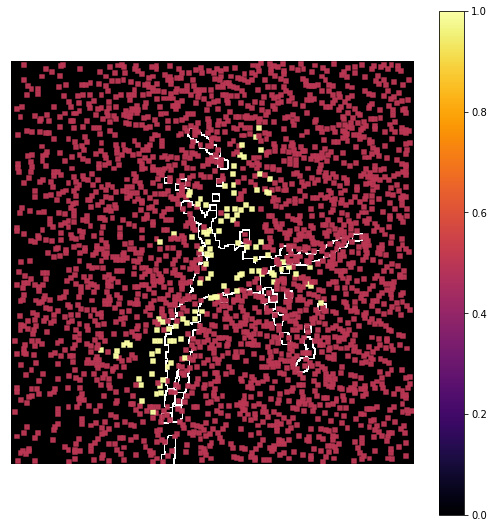

In [75]:
sel = (posT[:,-1]==5)*(posT[:,0]<512)
tpos = posT[sel,:2]
timsk = imsk[sel]
cc = 0.5*(timsk==1)+0.5
#mask = zeros((512,512))
figure(figsize=(7,7))
visualization(mask,pos=tpos,widthr=5,heightr=5,color=cc,lcolorbar=True)

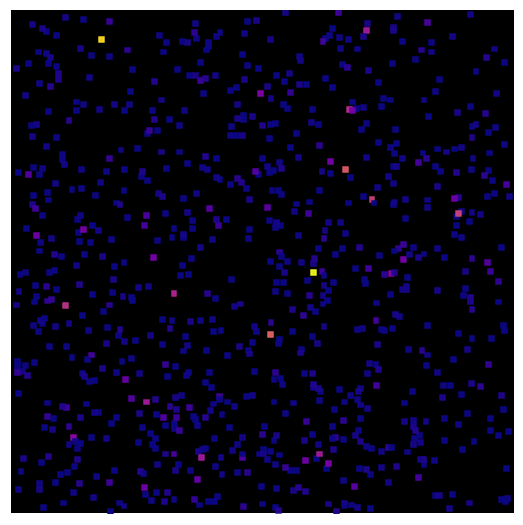

In [12]:
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])
sel = (yt>3.0)#*(Des[:,0]<.50e-2)
sel = (yt>3.0)*(posT[:,-1]==10)*(posT[:,0]<512)
mask = pytiff.Tiff(nwdirs[10]+"../../cell3_Mask_CMOS.tif")[:,:]
tpos = posT[sel,:2]
timsk = imsk[sel]
cc = (Des[sel,0]-min(Des[sel,0]))/(max(Des[sel,0])-min(Des[sel,0]))
figure(figsize=(7,7))
visualization(mask*0,pos=tpos,widthr=5,heightr=5,color=cc,cmap = get_cmap("plasma"))

In [13]:
import cv2 as cv

## Check the mask 

This also helps to check whether the numbering of the arrays is OK or not

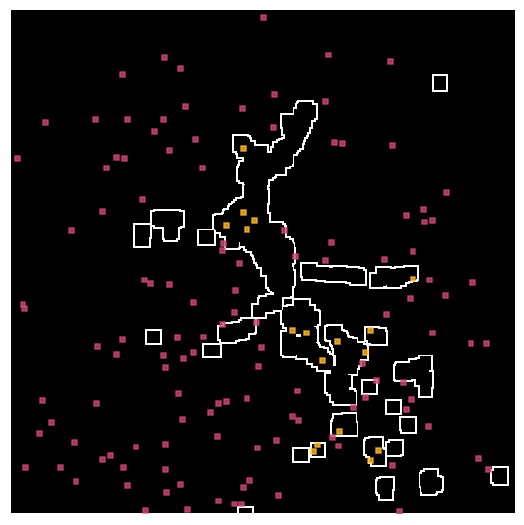

In [14]:
icell = 0
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])
sel = (yt>3.0)#*(Des[:,0]<.50e-2)
sel = (yt>3.0)*(posT[:,-1]==icell)*(posT[:,0]<512)
mask = pytiff.Tiff(maskfiles[icell])[:,:]
mask2 = cv.dilate(mask,ones((5,5)))
mask = mask2-mask
tpos = posT[sel,:2]
timsk = imsk[sel]
cc = (Des[sel,0]-min(Des[sel,0]))/(max(Des[sel,0])-min(Des[sel,0]))
cc = timsk*0.35+.5
figure(figsize=(7,7))
visualization(mask,pos=tpos,widthr=5,heightr=5,color=cc,cmap = get_cmap("plasma"),alpha=0.8)

/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


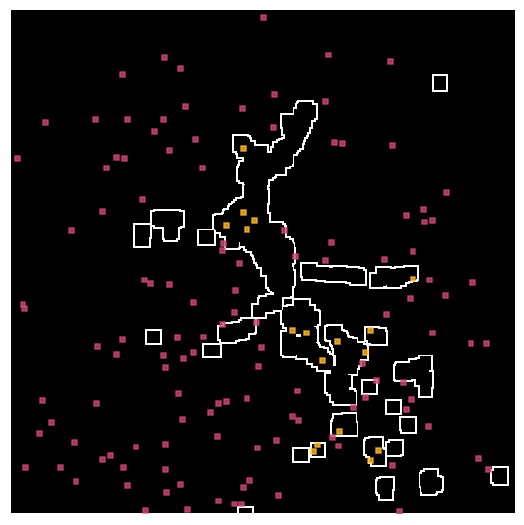

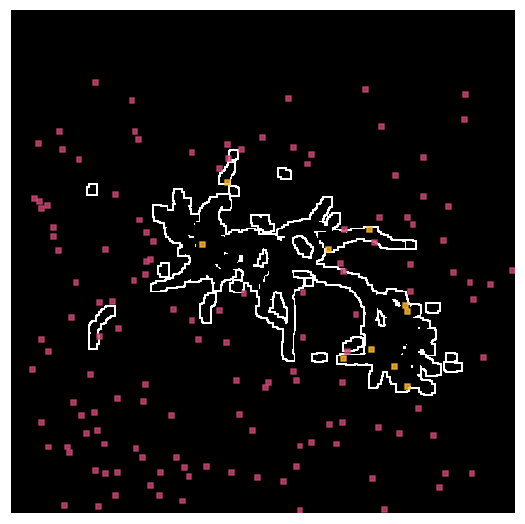

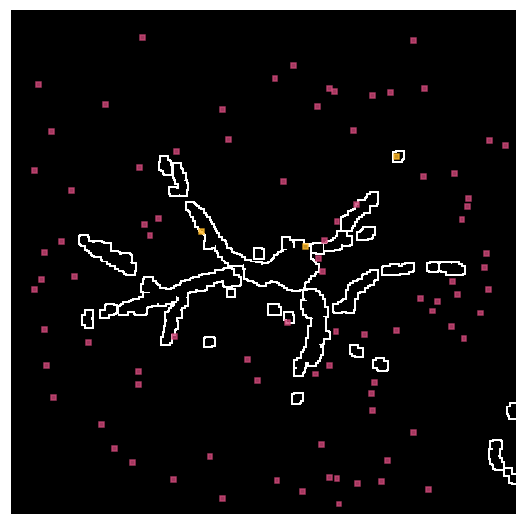

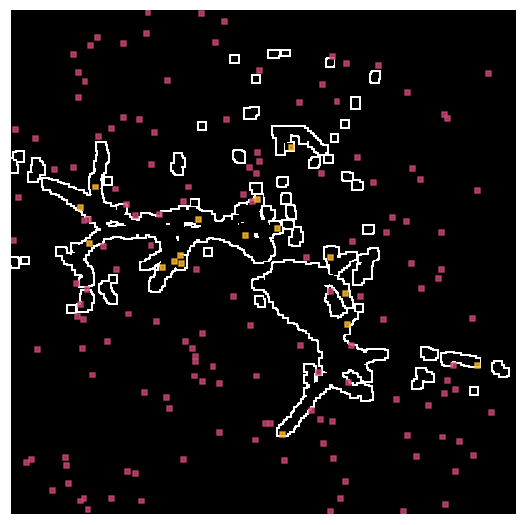

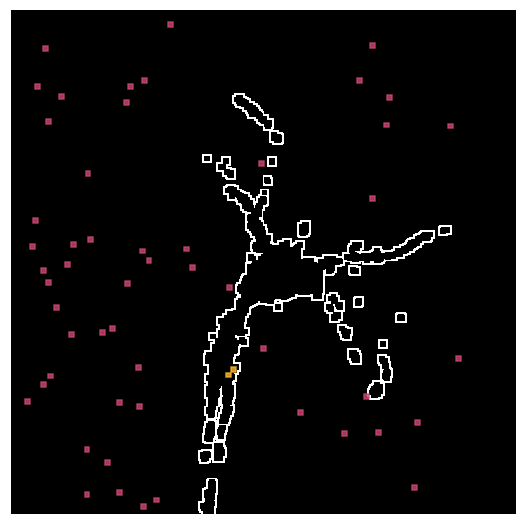

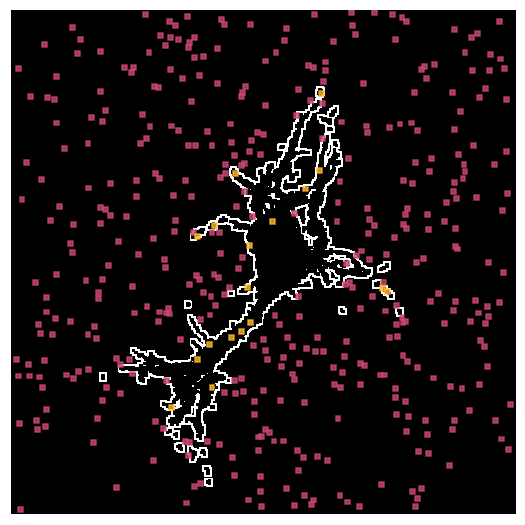

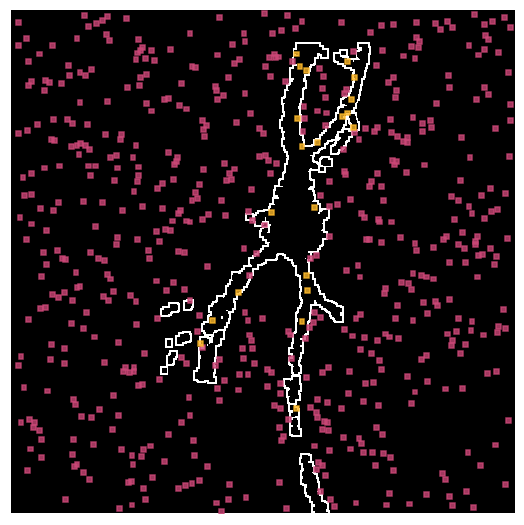

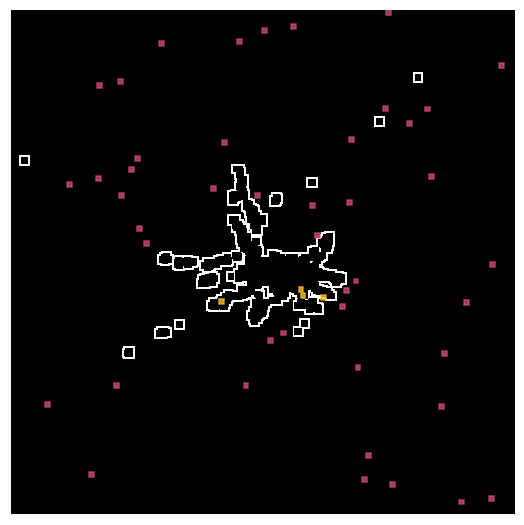

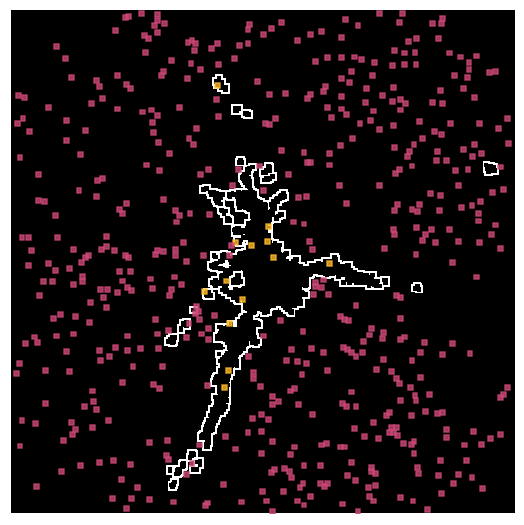

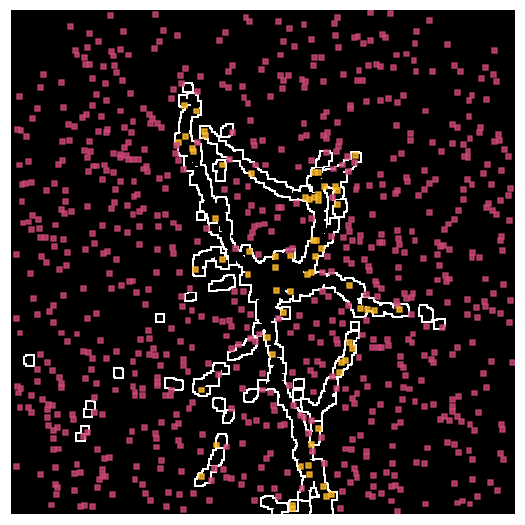

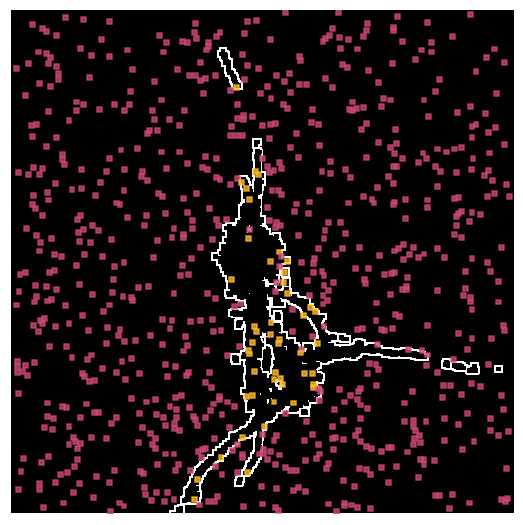

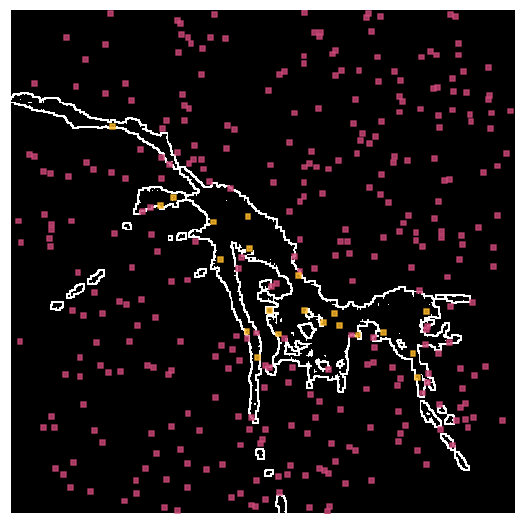

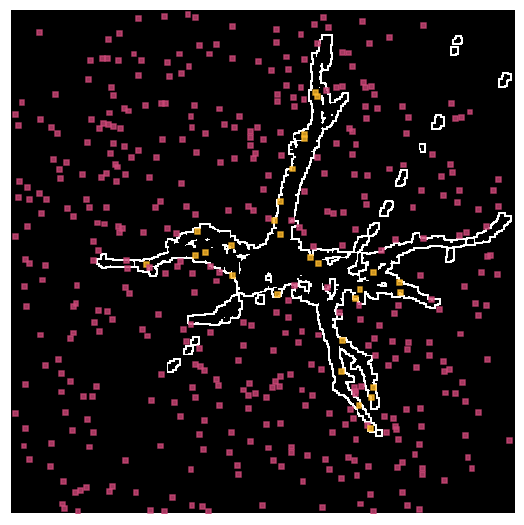

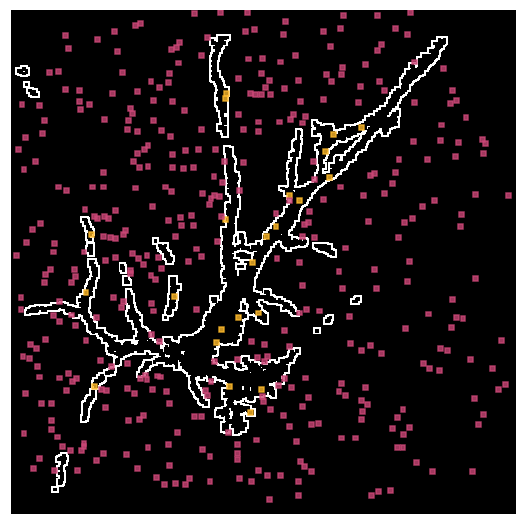

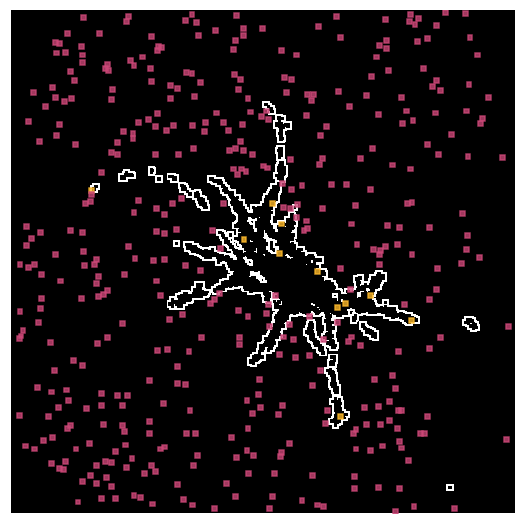

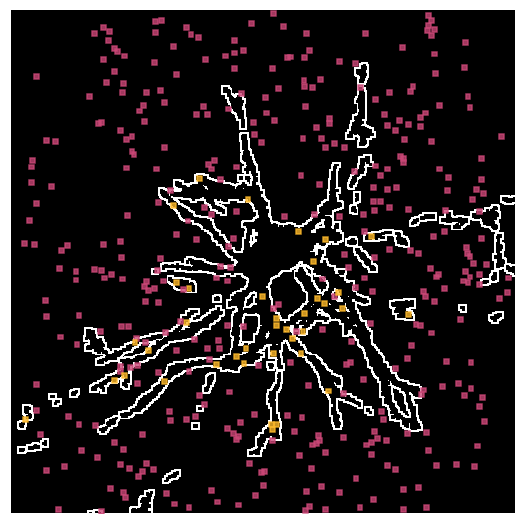

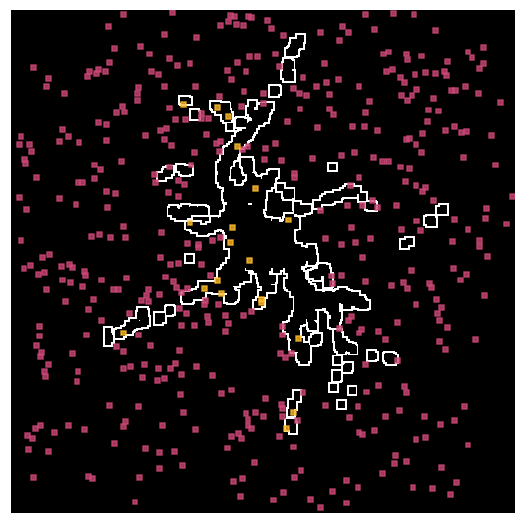

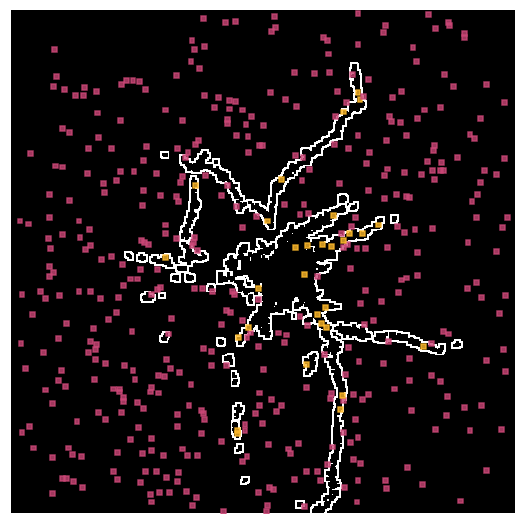

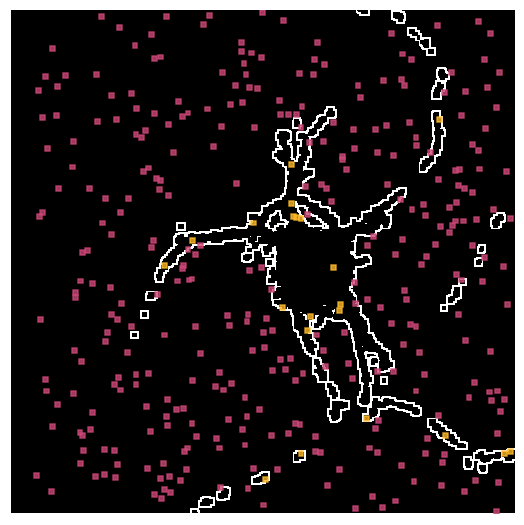

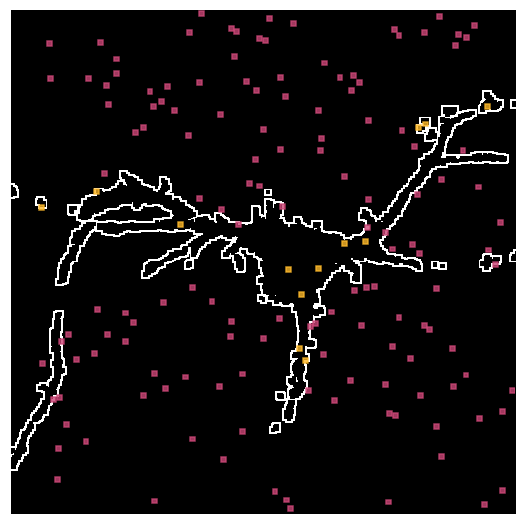

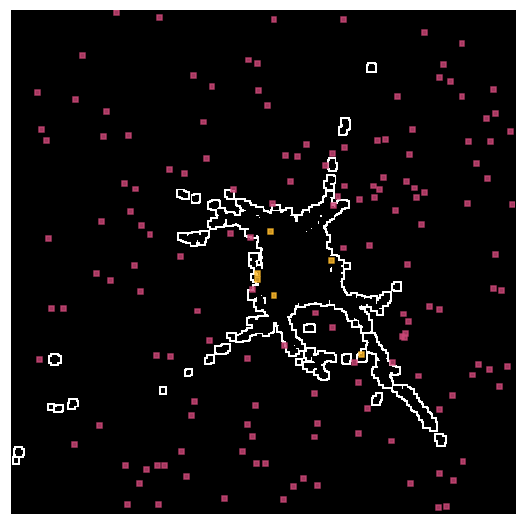

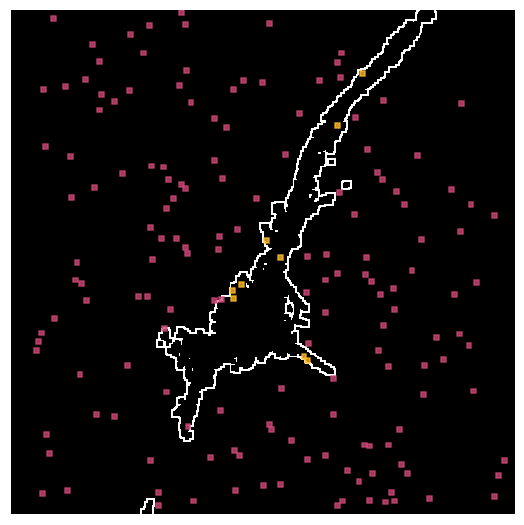

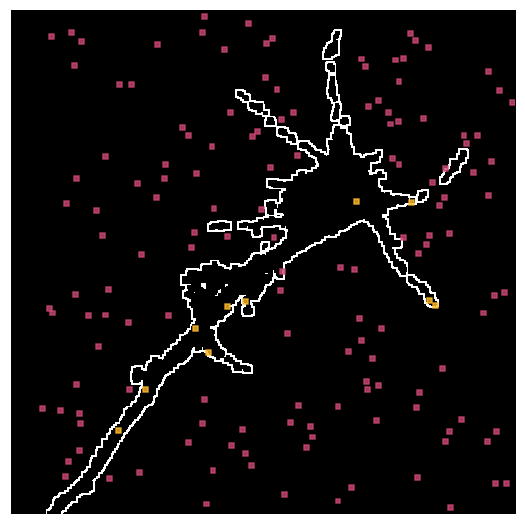

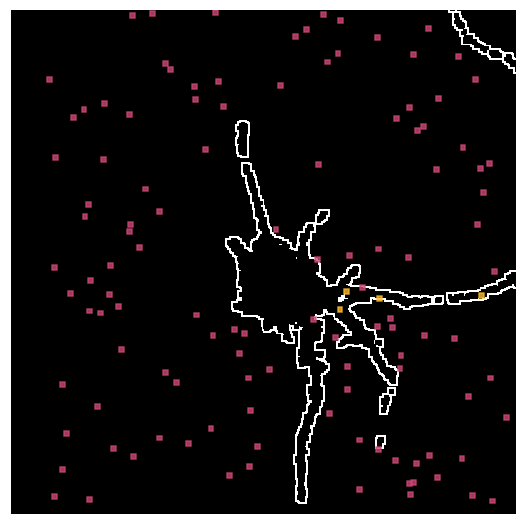

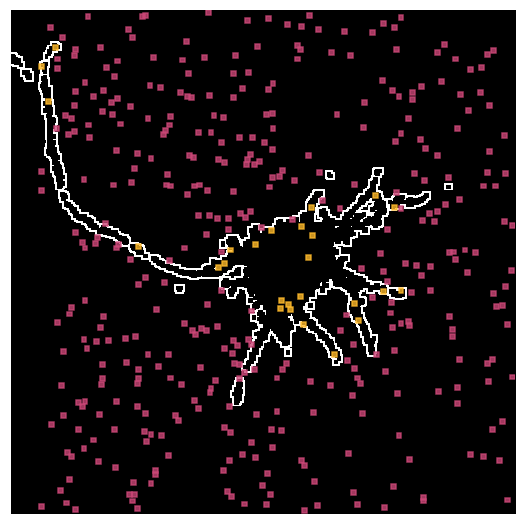

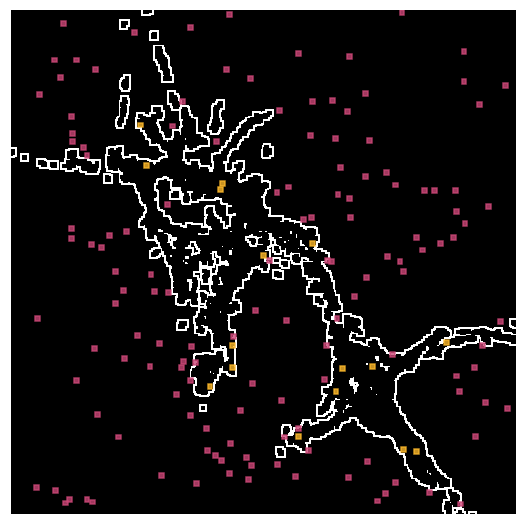

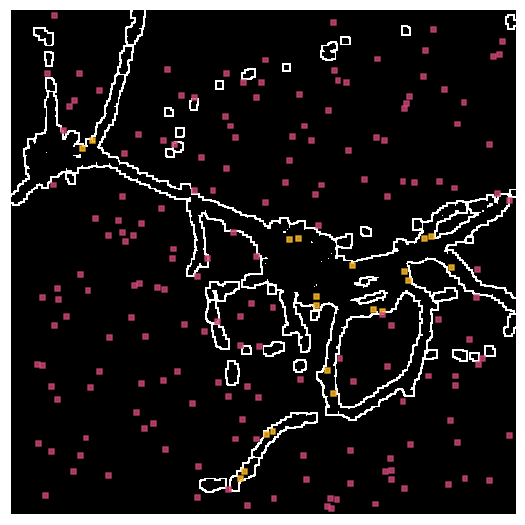

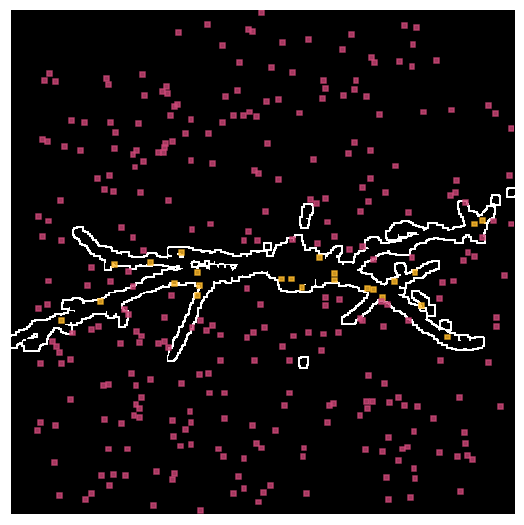

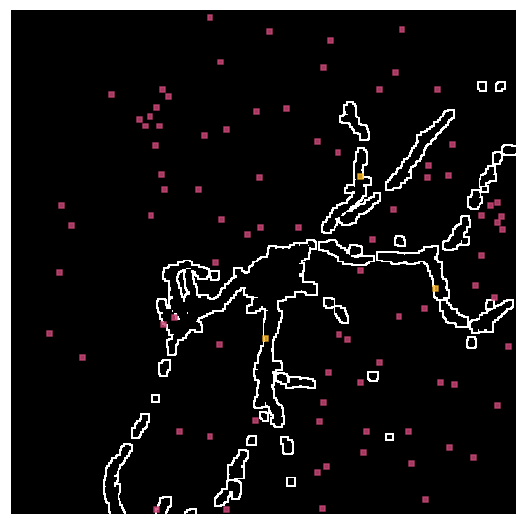

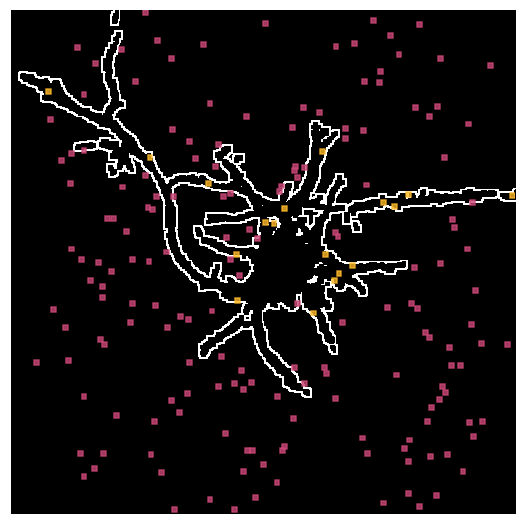

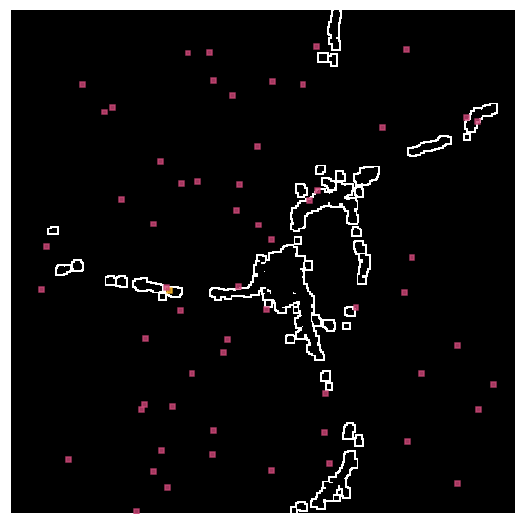

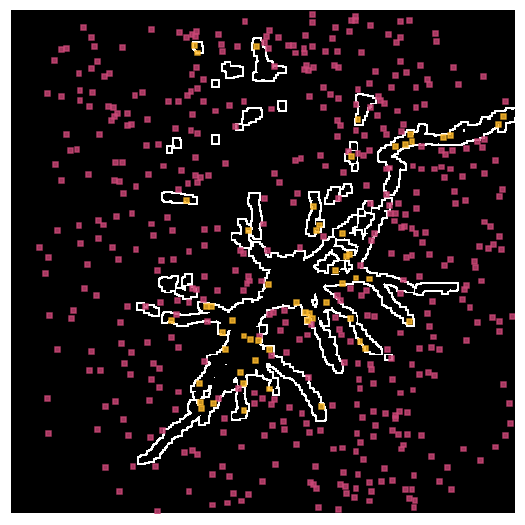

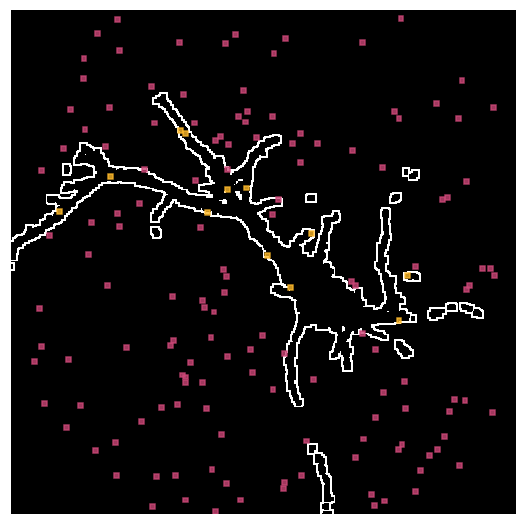

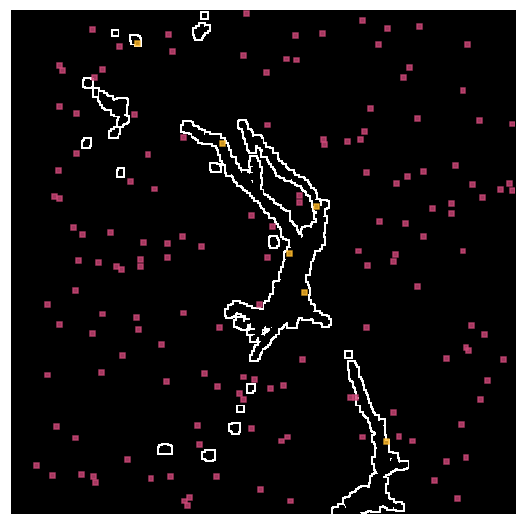

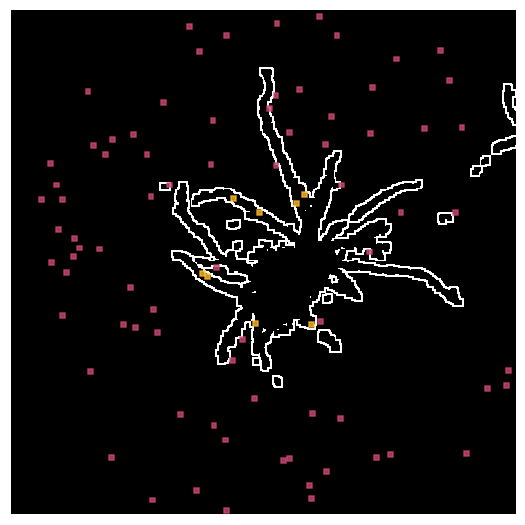

In [16]:

icell = 10
for icell in range(len(maskfiles)):
    s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
    yt = abs((dgps[:,3]-dgps[:,5])/s1)
    xt = 1.0*Des[:,0]
    sel = (xt>0)*(abs(yt)<20)
    xt[~sel] = 0
    yt[~sel] = 0
    xt[sel] = log10(xt[sel])
    yt[sel] = yt[sel] #log10(yt[sel])
    sel = (yt>3.0)#*(Des[:,0]<.50e-2)
    sel = (yt>3.0)*(posT[:,-1]==icell)*(posT[:,0]<512)
    mask = pytiff.Tiff(maskfiles[icell])[:,:]
    mask2 = cv.dilate(mask,ones((5,5)))
    mask = mask2-mask
    tpos = posT[sel,:2]
    timsk = imsk[sel]
    cc = (Des[sel,0]-min(Des[sel,0]))/(max(Des[sel,0])-min(Des[sel,0]))
    cc = (timsk==1)*0.35+0.5
    figure(figsize=(7,7))
    visualization(mask,pos=tpos,widthr=5,heightr=5,color=cc,cmap = get_cmap("plasma"),alpha=0.8)
    savefig("field_"+str(icell).zfill(2)+".png")

### Remarks
- There is some issue with those at the edges, but probably this is due to the way I define them (outer boundary)
- Some fields are full of good particles... We need to produce movies to see if this is correct or not.


Now for something completely different

In [85]:
def cellPicture(cc,posT,imsk,sel,icell,maskfiles,normalized = True,reversed_cc = False,figsize = (7,7),lcolorbar=False):
    # We create a mask
    mask = pytiff.Tiff(maskfiles[icell])[:,:]
    mask2 = cv.dilate(mask,ones((5,5)))
    mask = mask2-mask
    
    tpos = posT[sel,:2]
    timsk = imsk[sel]
    #cc = yt
    tcc = 1.0*cc[sel]
    cco = tcc[isfinite(tcc)]
    if normalized:
        if not reversed_cc:
            tcc = (tcc-min(cco))/(max(cco)-min(cco))
        else:
            tcc = (max(cco)-tcc)/(max(cco)-min(cco))
        
    fig = figure(figsize=figsize)
    ax,cb = visualization(mask,pos=tpos,widthr=5,heightr=5,color=tcc,coloraxis=cco,cmap = get_cmap("plasma"),alpha=0.8,lcolorbar=lcolorbar)
    return(fig,ax,cb)


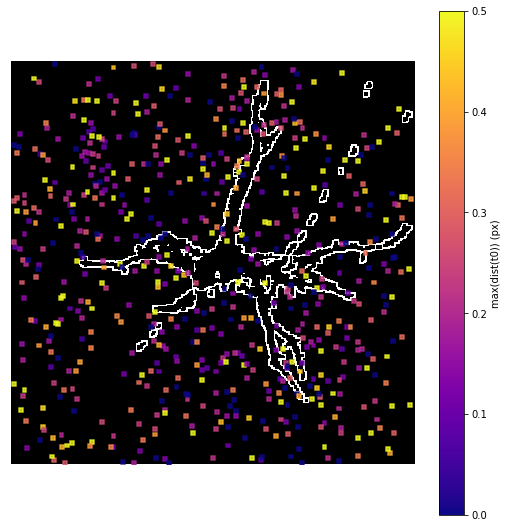

In [88]:
icell = randint(len(maskfiles))
reversed_cc = True;#False
for icell in permutation(arange(len(maskfiles)))[:1]:
    s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
    g2d = abs((dgps[:,3]-dgps[:,5])/s1)
    mds = 1.0*sqrt(tmark[:,2]/tmark[:0])
    mv0 = 1.0*Des[:,0]
    sel = (abs(g2d)<20)*(mv0>0)*(g2d>2.5)*(posT[:,-1]==icell)*(posT[:,0]<512)
    mds[mds>1] = 0.0
    mds[mds>0.5] = 0.50
    fig,ax,cb = cellPicture(mds,posT,imsk,sel,icell,maskfiles,reversed_cc=False,lcolorbar=True)
    cb.set_label("max(dist(t0)) (px)")
    #savefig("maxd/field_Cmaxd_"+str(icell).zfill(2)+".png")
    

/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


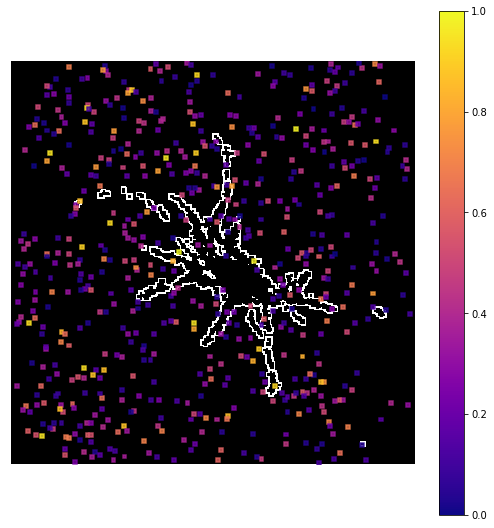

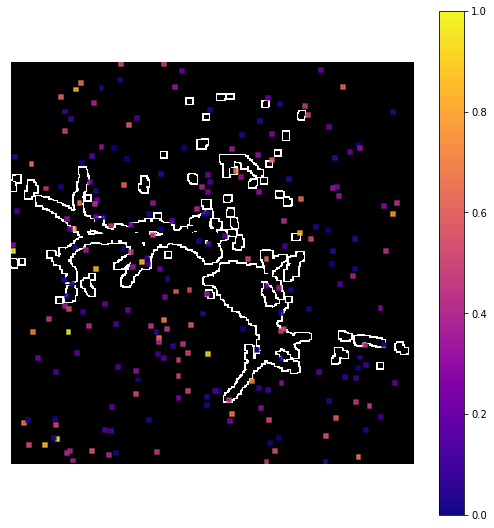

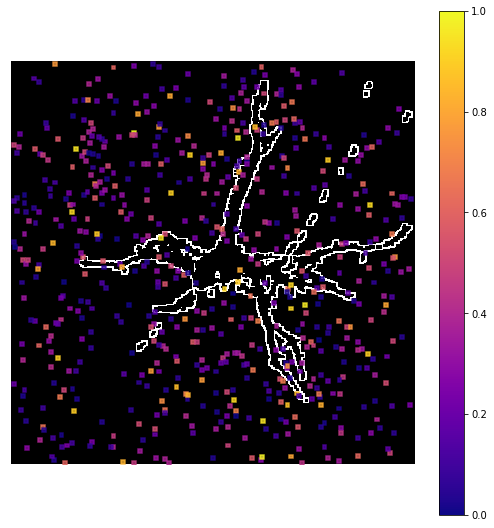

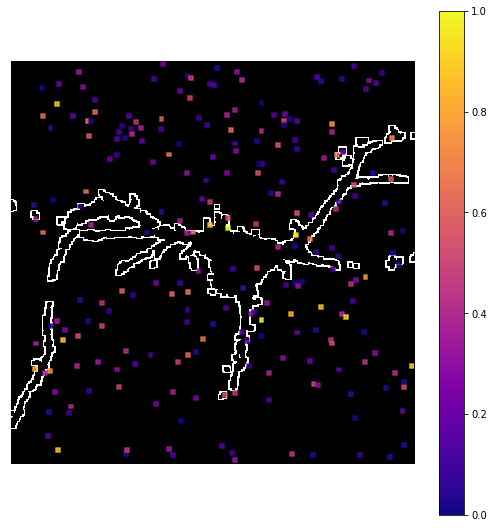

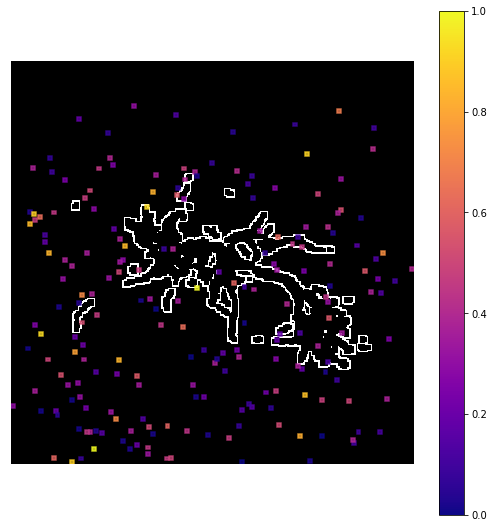

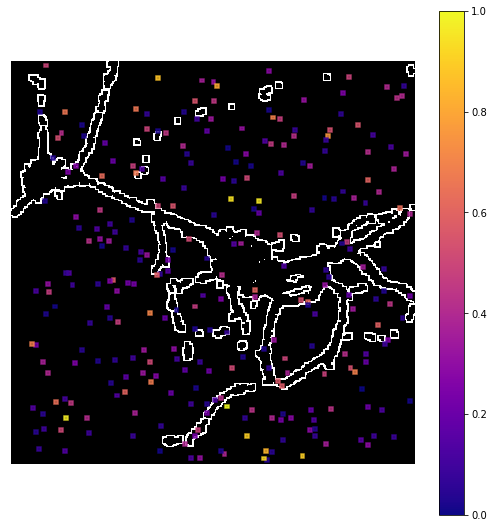

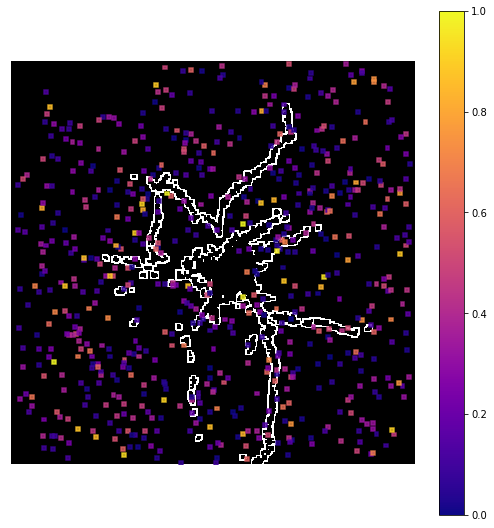

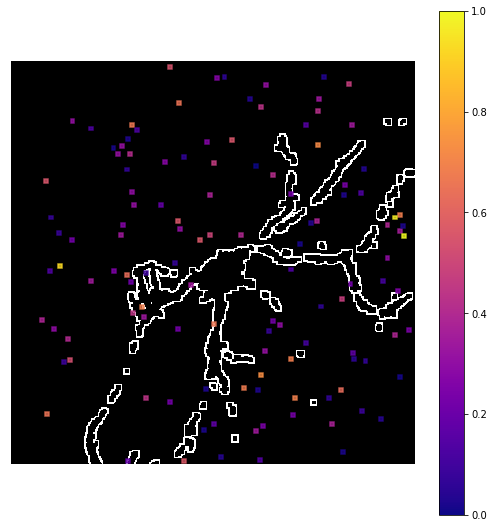

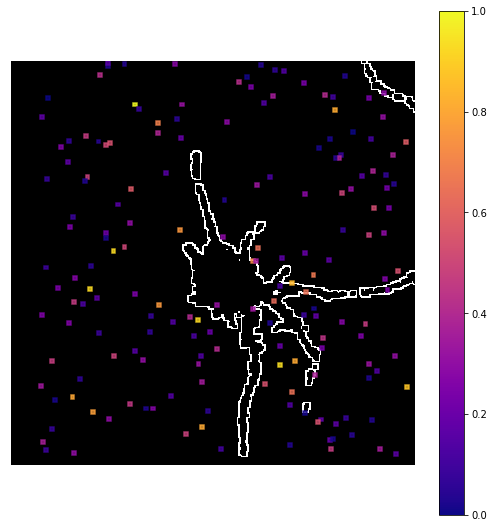

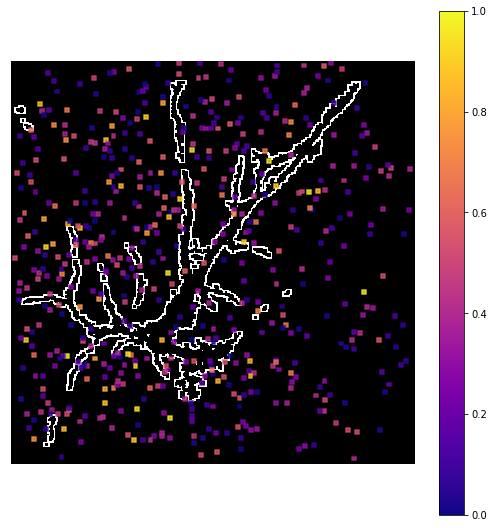

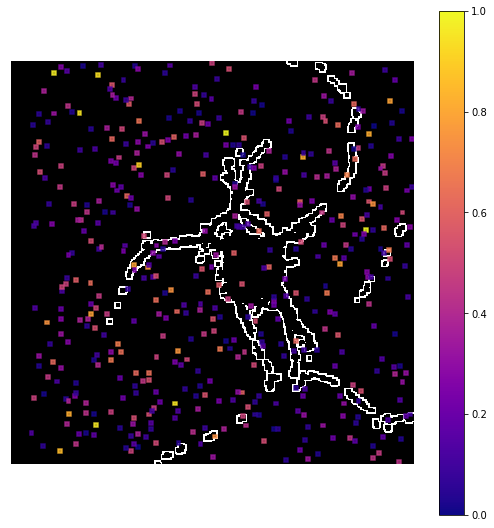

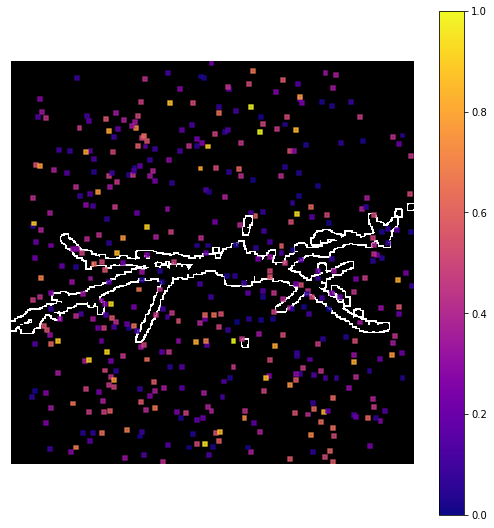

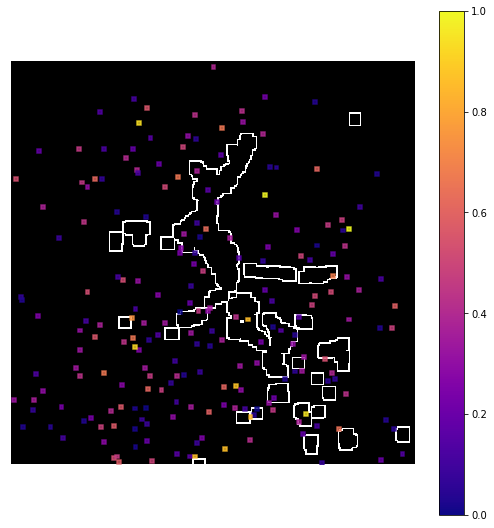

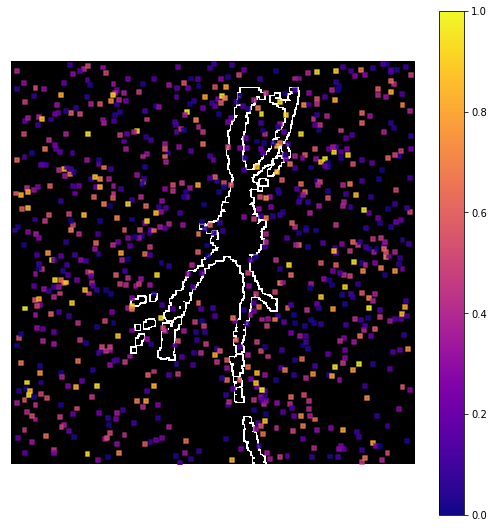

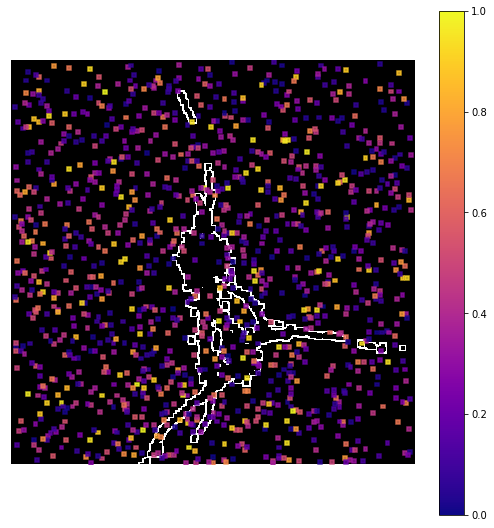

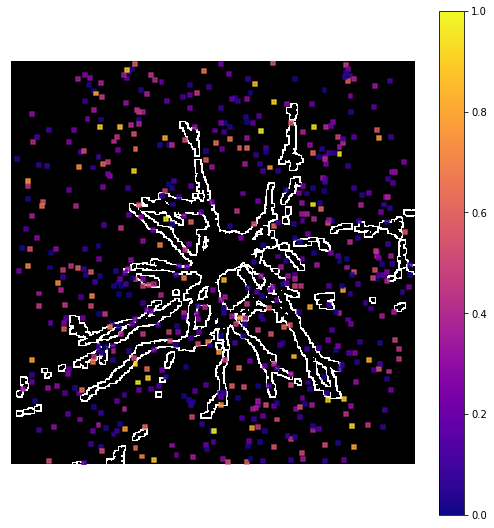

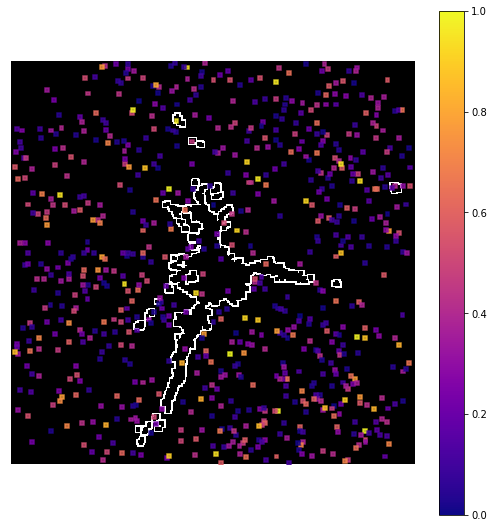

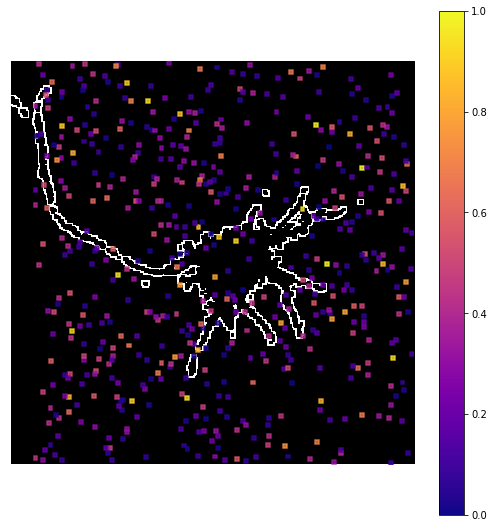

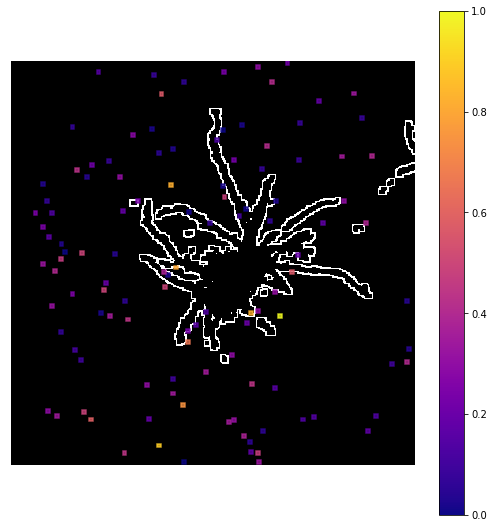

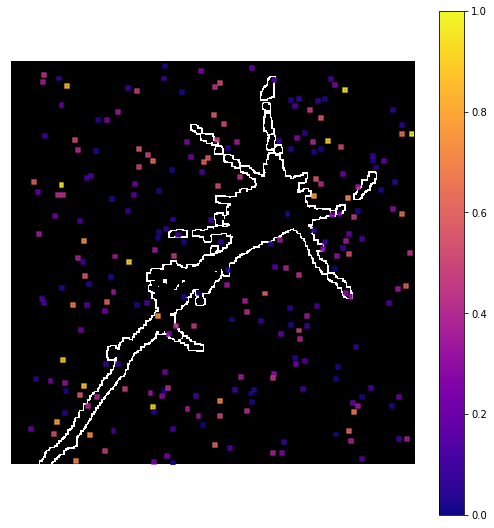

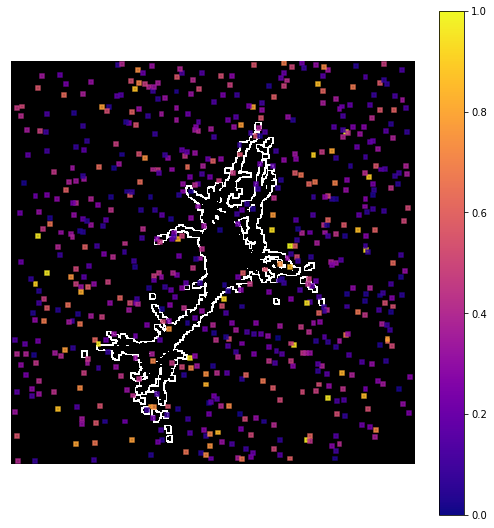

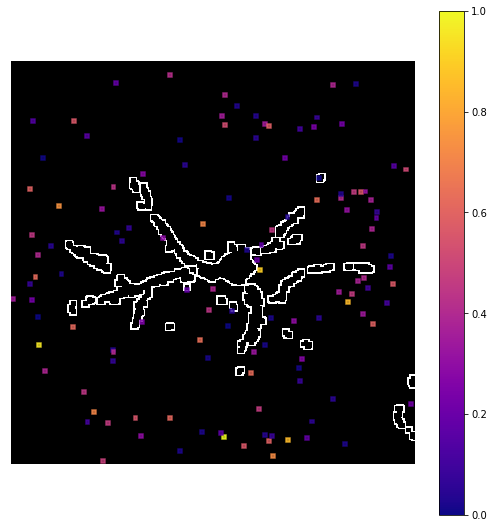

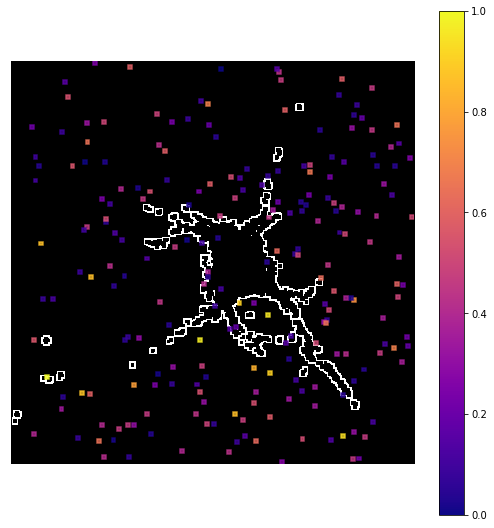

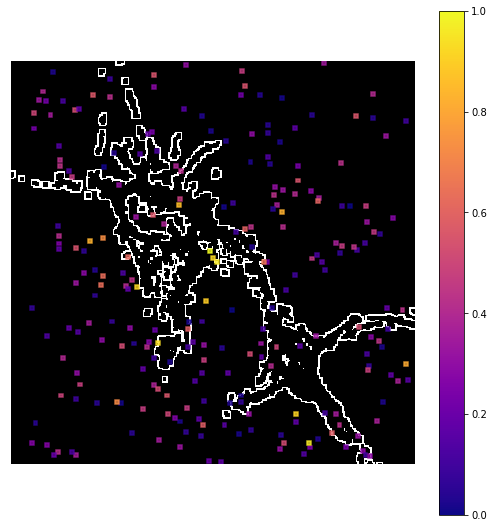

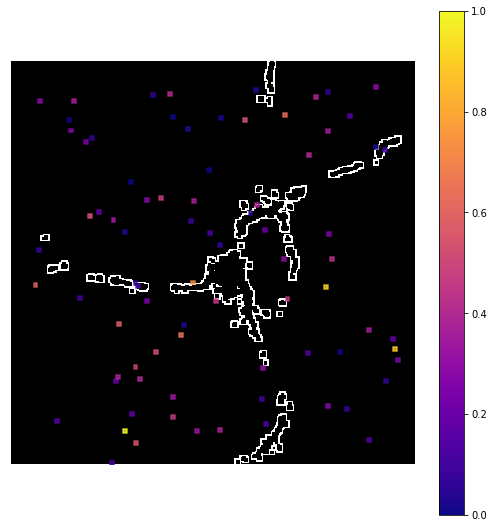

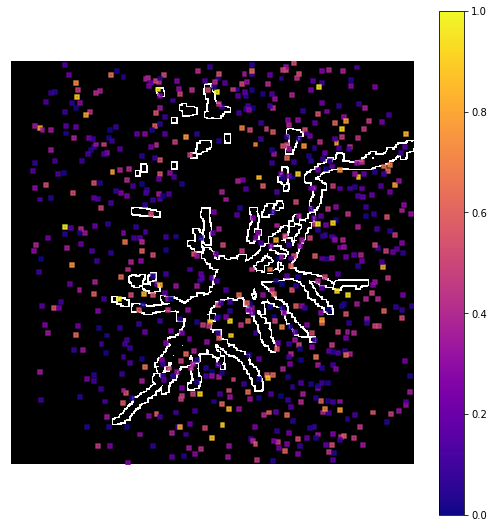

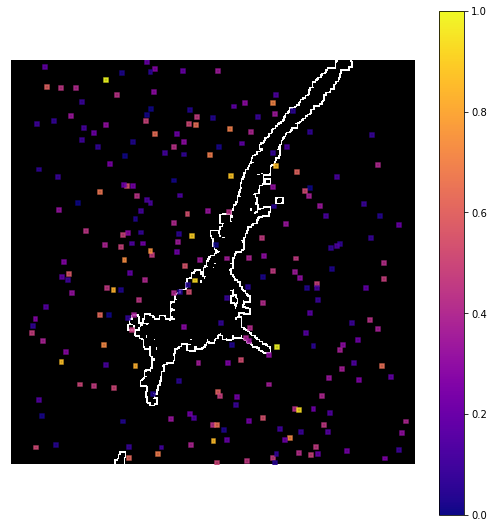

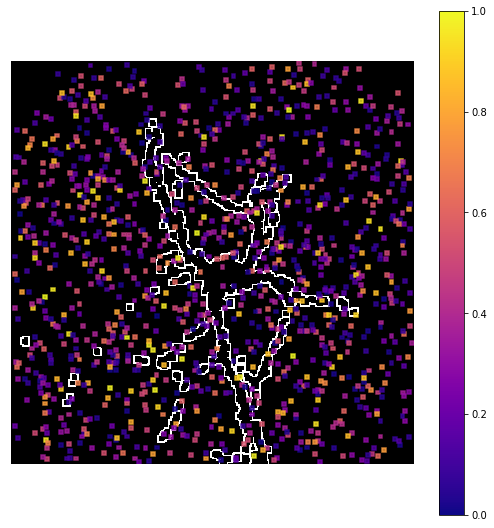

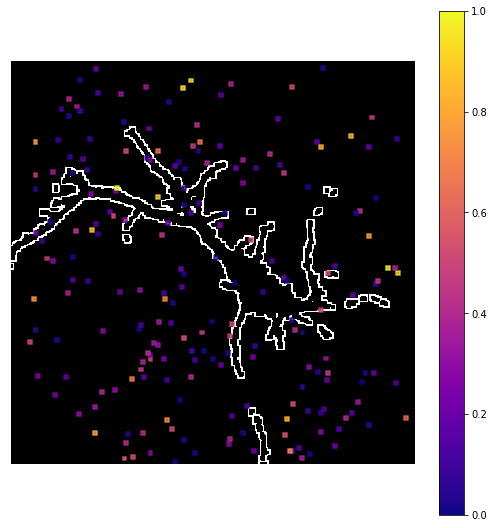

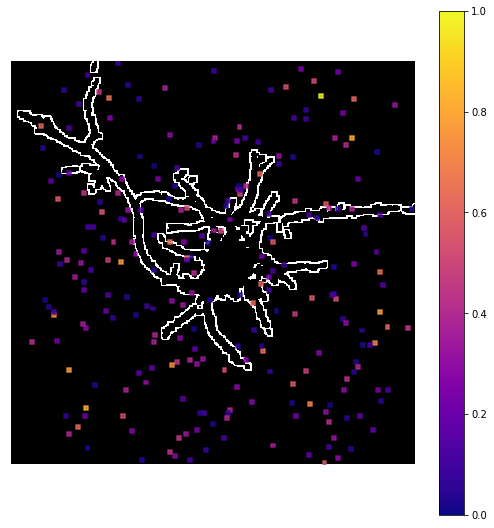

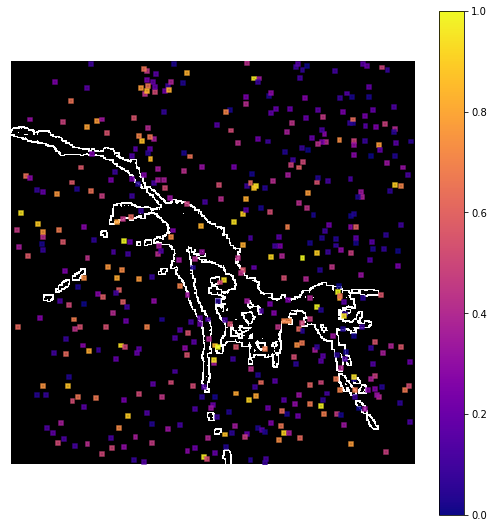

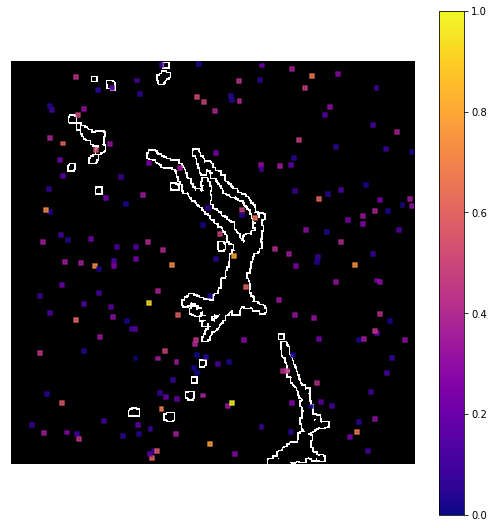

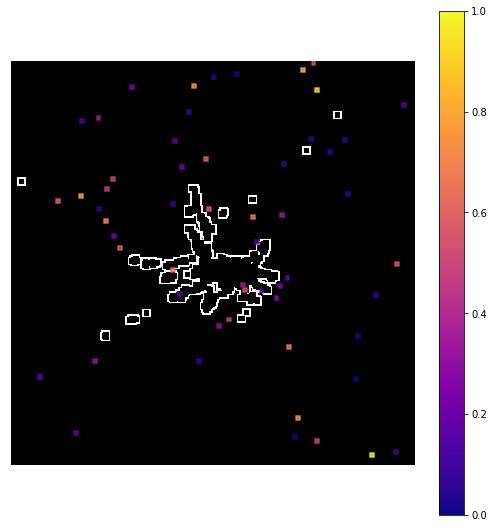

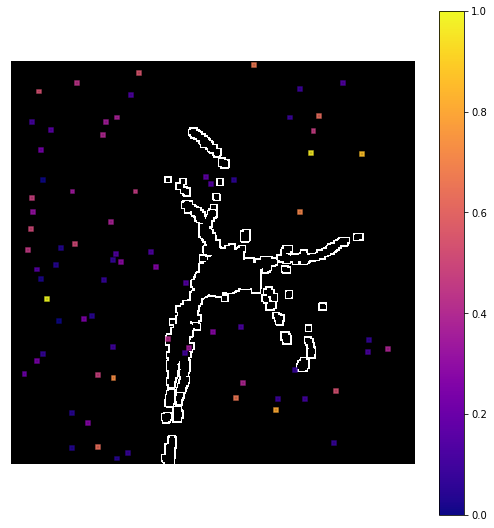

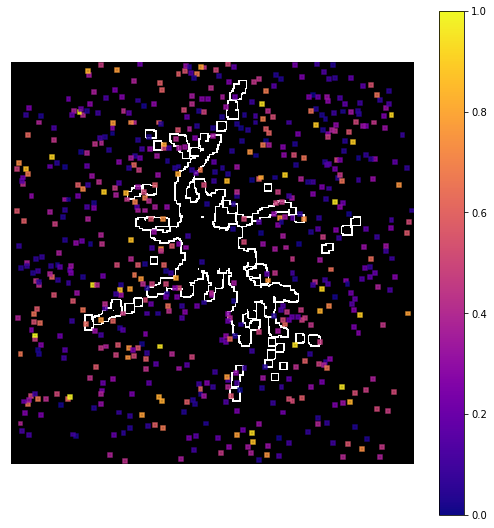

In [70]:
icell = randint(len(maskfiles))
reversed_cc = True;#False
for icell in permutation(arange(len(maskfiles))):
    s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
    g2d = abs((dgps[:,3]-dgps[:,5])/s1)
    mds = 1.0*sqrt(tmark[:,2])
    mds = 1.0*sqrt(tmark[:,2]/tmark[:,0])
    mv0 = 1.0*Des[:,0]
    sel = (abs(g2d)<20)*(mv0>0)*(g2d>2.5)*(posT[:,-1]==icell)*(posT[:,0]<512)
    
    fig = cellPicture(mds,posT,imsk,sel,icell,maskfiles,reversed_cc=False,lcolorbar=True)
    savefig("maxd/field_ratio_"+str(icell).zfill(2)+".png")

    #savefig("maxd/field_Cmaxd_"+str(icell).zfill(2)+".png")
    #fig.colorbar(mappable=get_cmap("plasma"))

/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


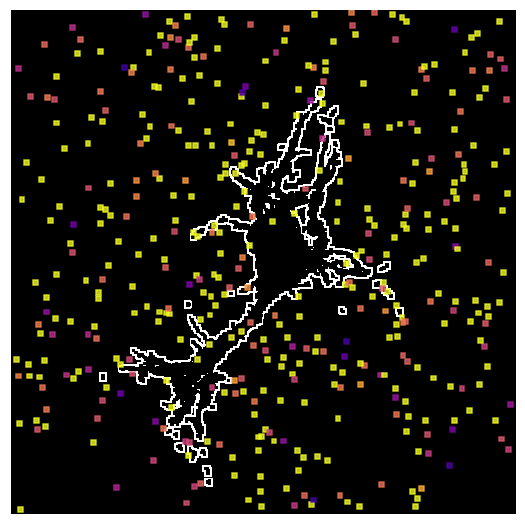

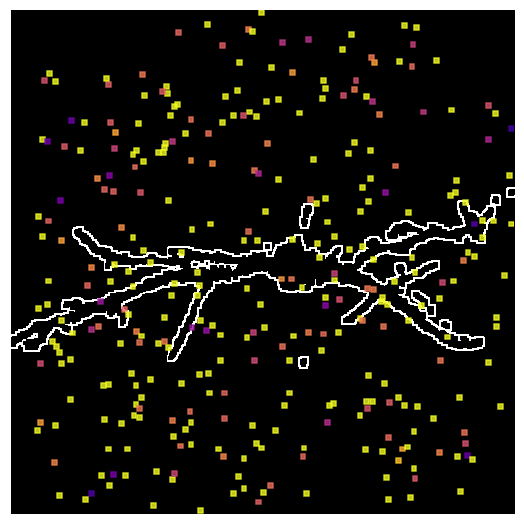

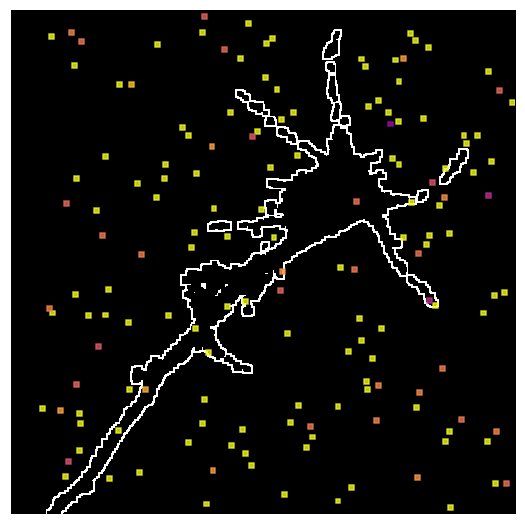

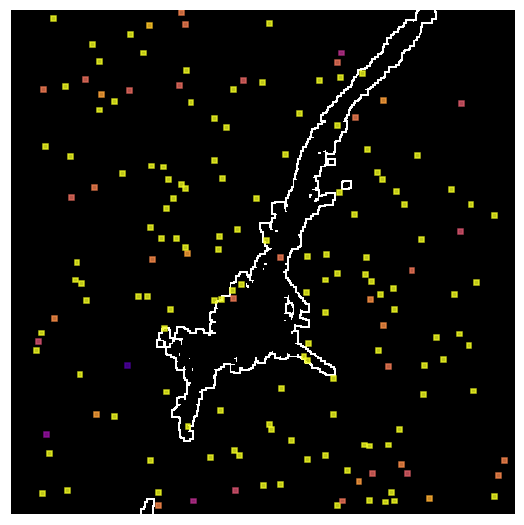

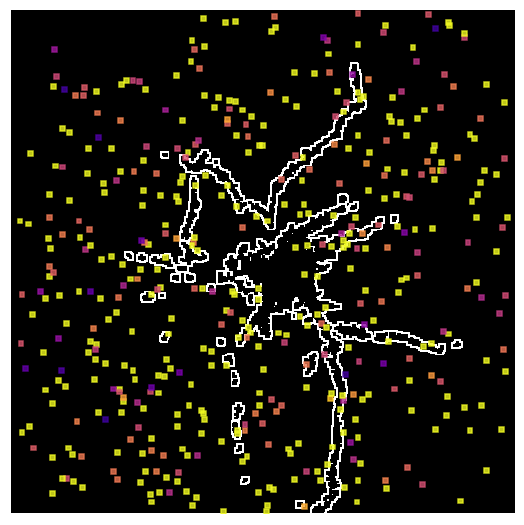

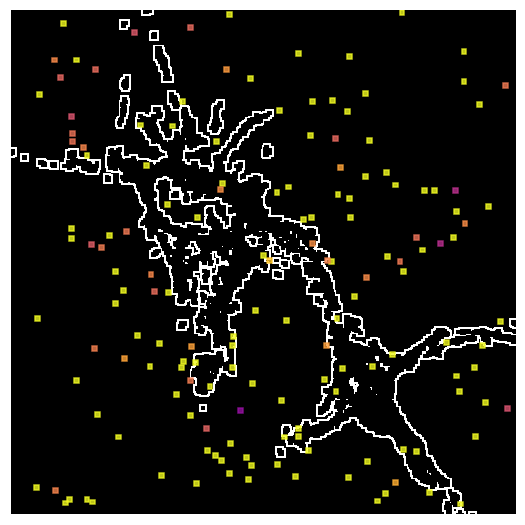

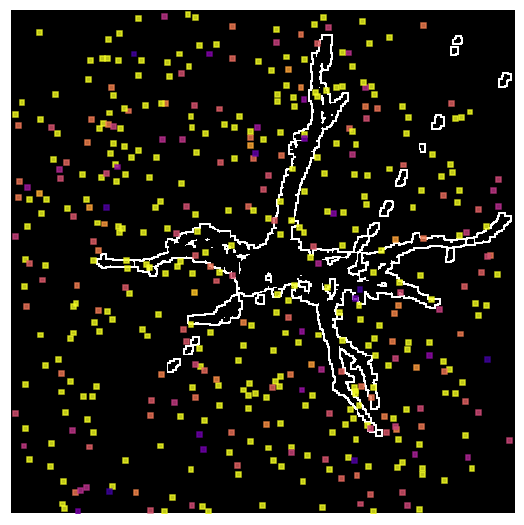

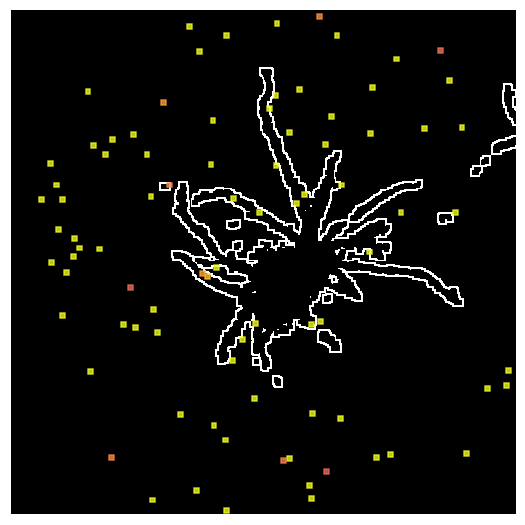

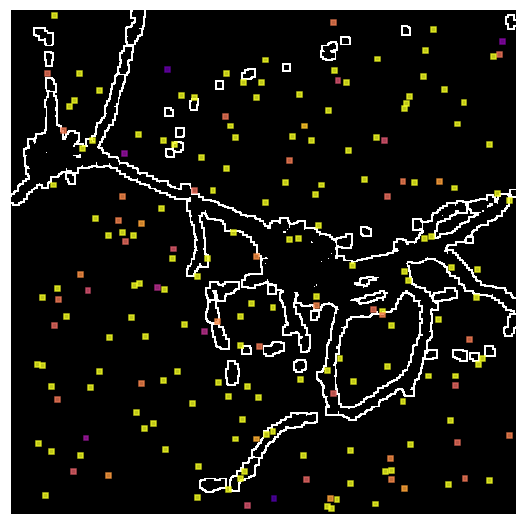

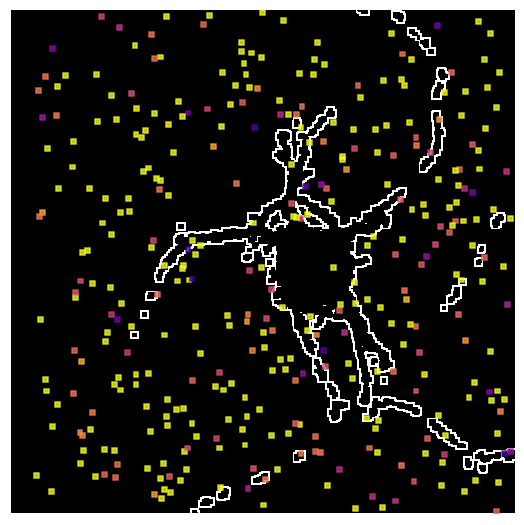

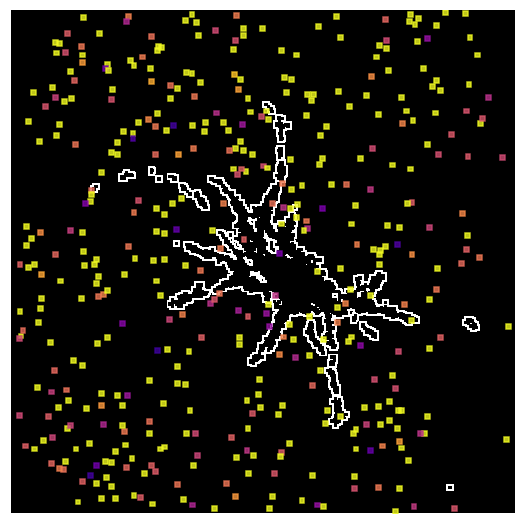

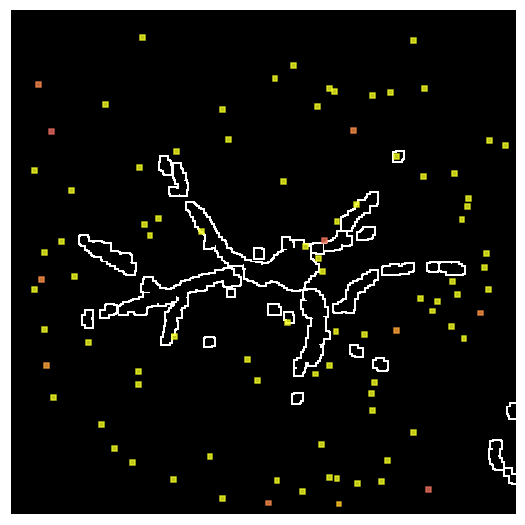

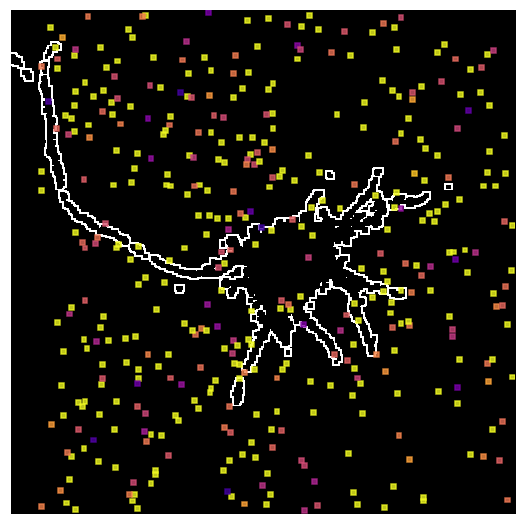

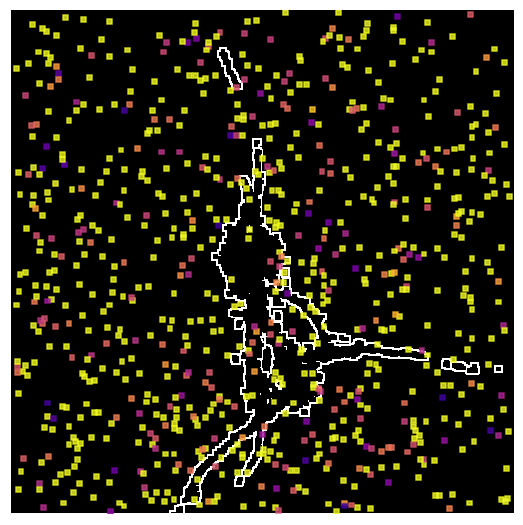

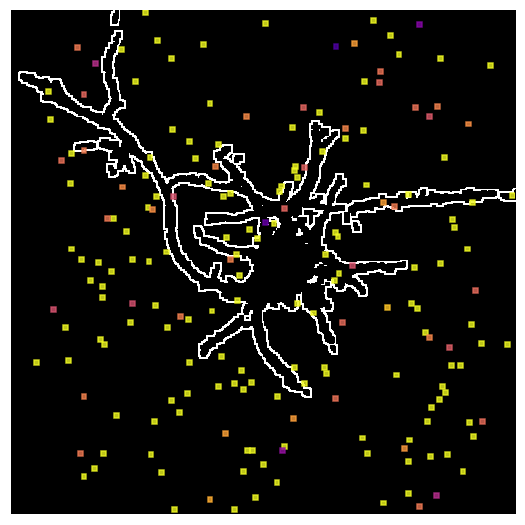

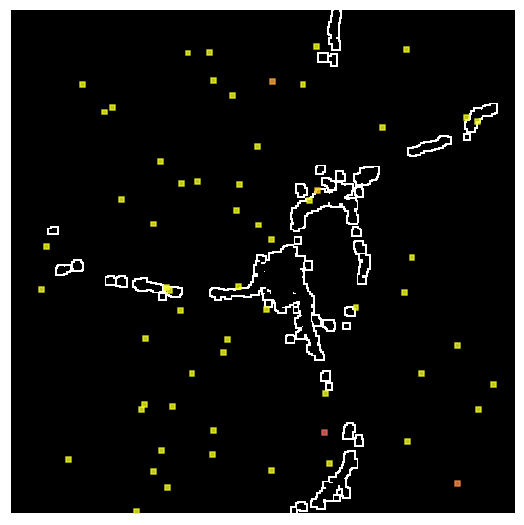

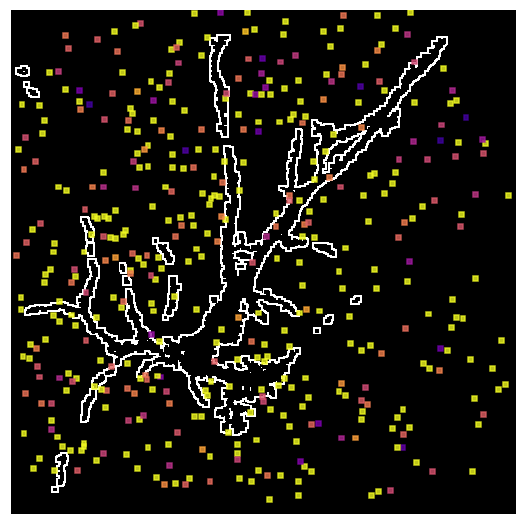

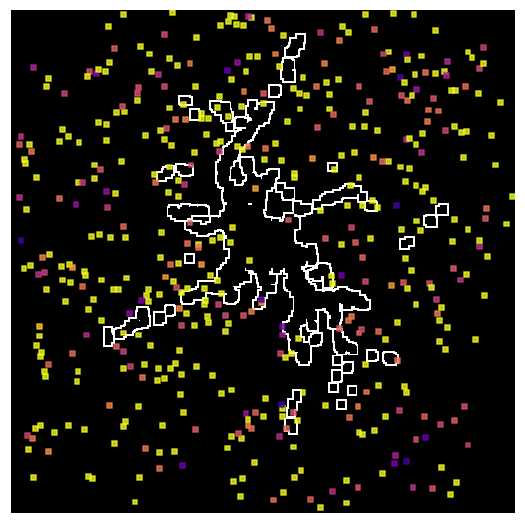

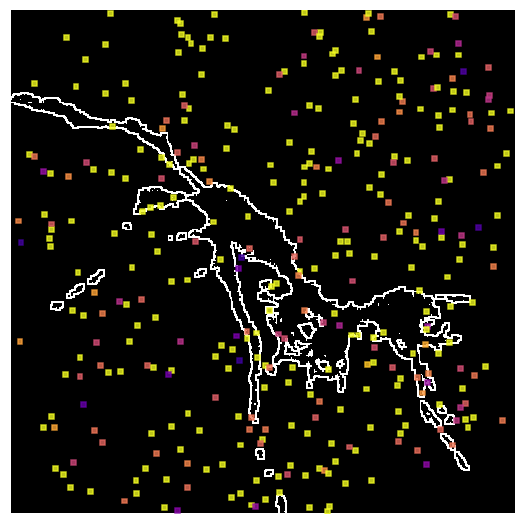

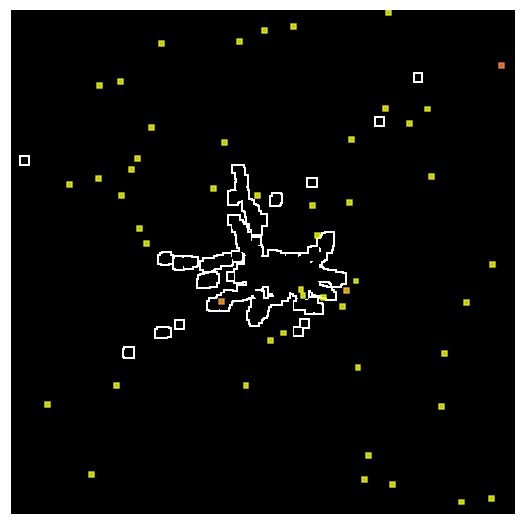

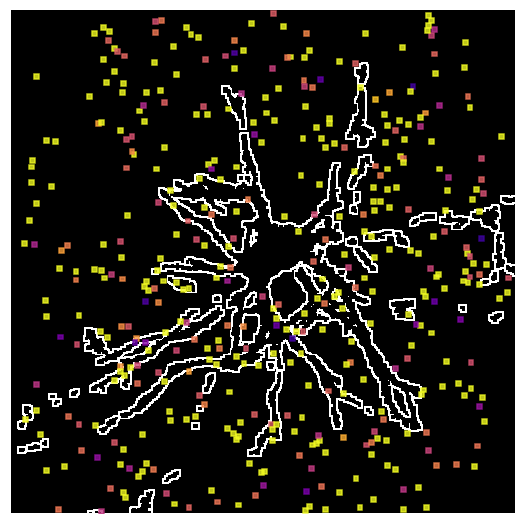

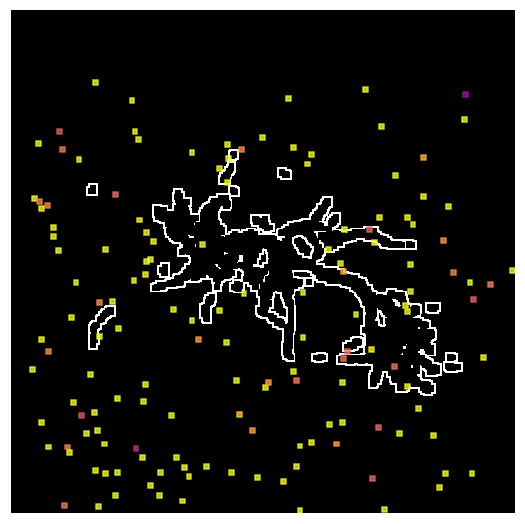

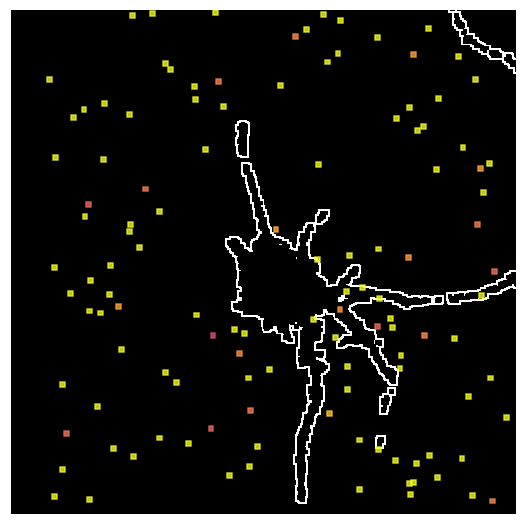

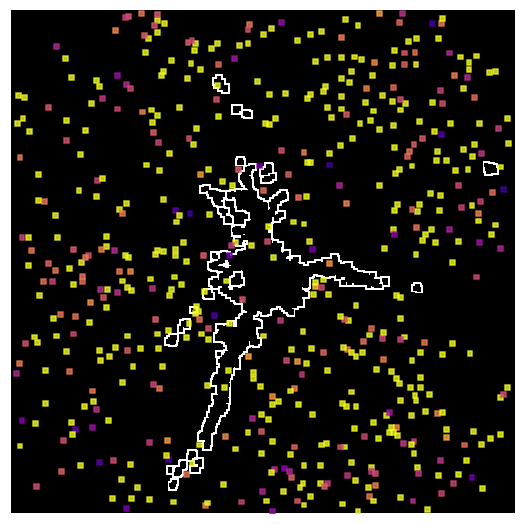

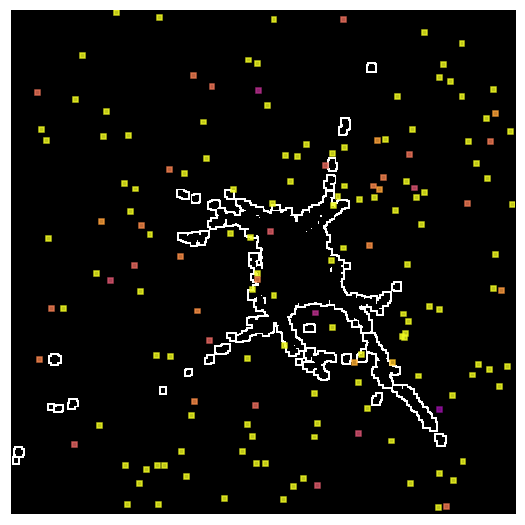

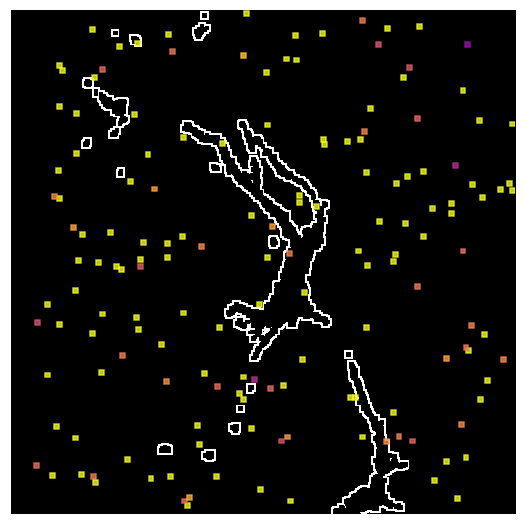

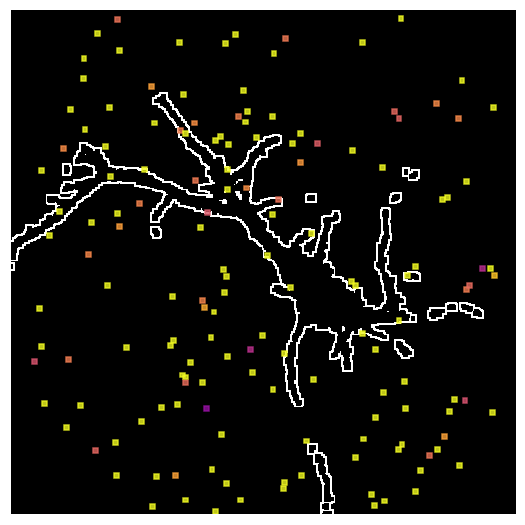

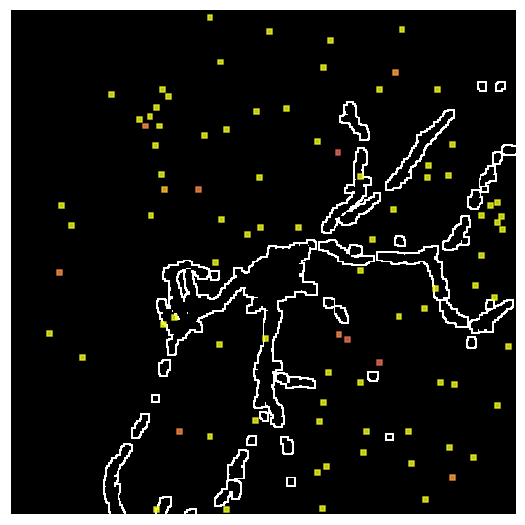

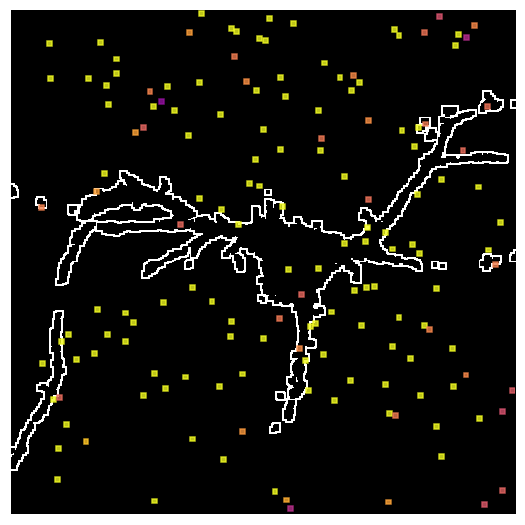

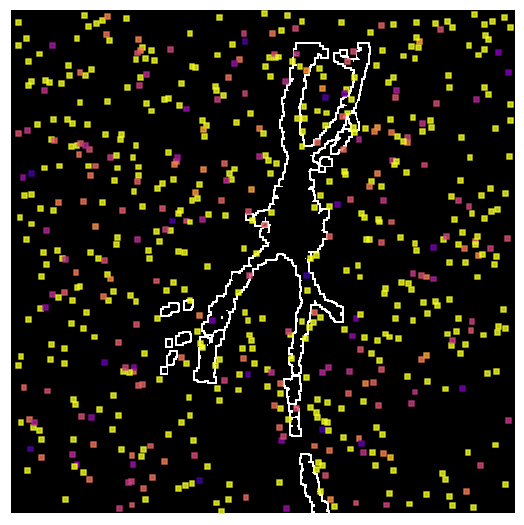

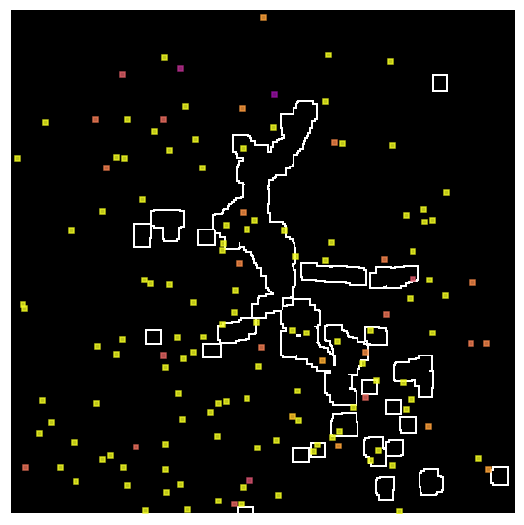

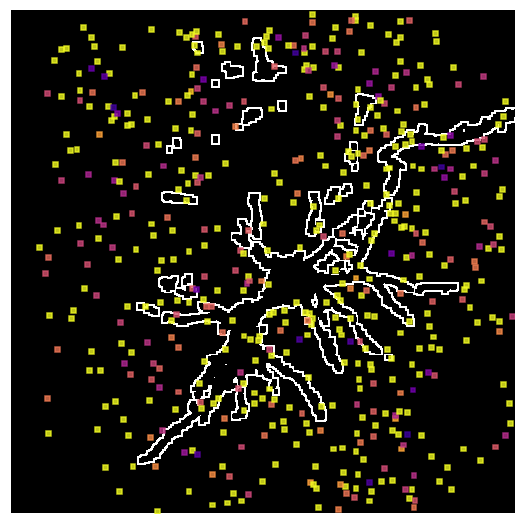

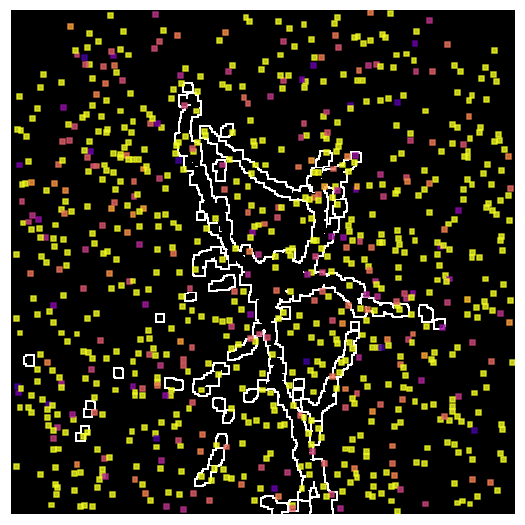

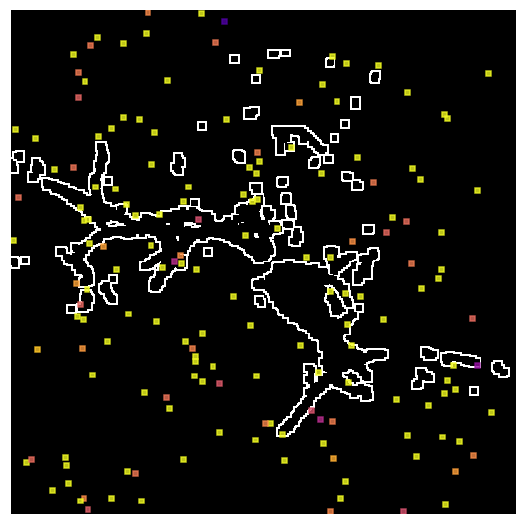

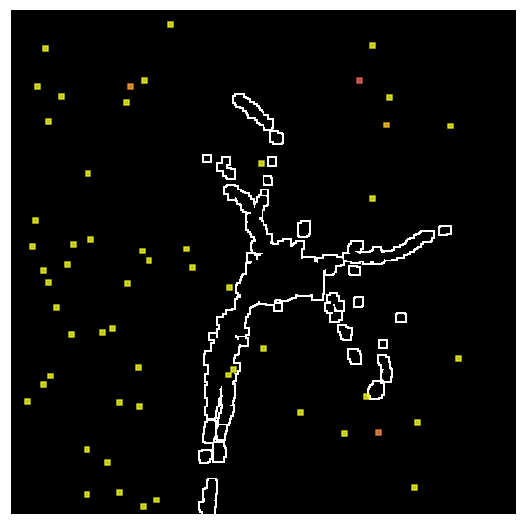

In [21]:
icell = randint(len(maskfiles))
reversed_cc = True;#False
for icell in permutation(arange(len(maskfiles))):
    s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
    yt2 = abs((dgps[:,3]-dgps[:,5])/s1)
    yt = 1.0*sqrt(tmark[:,2])
    xt = 1.0*Des[:,0]
    sel = (xt>0)*(abs(yt2)<20)*(abs(yt2)>2.5)
    xt[~sel] = 0
    yt[~sel] = 0
    xt[sel] = log10(xt[sel])
    yt[sel] = yt[sel] #log10(yt[sel])
    sel = (yt2>3.0)*(posT[:,-1]==icell)*(posT[:,0]<512)
    # Selection by movility
    sel = (log10(Des[:,0])< (-2.5))*(posT[:,-1]==icell)*(posT[:,0]<512)
    #
    sel = (yt2>3.0)*(posT[:,-1]==icell)*(posT[:,0]<512)
    mask = pytiff.Tiff(maskfiles[icell])[:,:]
    mask2 = cv.dilate(mask,ones((5,5)))
    mask = mask2-mask
    tpos = posT[sel,:2]
    timsk = imsk[sel]
    # Color by movility
    cc = log10(Des[sel,0]*1)
    # Color by 2G
    cc = 1.0/(1+exp(-(yt[sel]-2.5)*10))
    # Color by max distance
    cc = log10(yt)
    cco = cc[isfinite(cc)]
    if not reversed_cc:
        cc = (cc-min(cco))/(max(cco)-min(cco))
    else:
        cc = (max(cco)-cc)/(max(cco)-min(cco))
    #cc = (timsk==1)*0.35+0.5
    figure(figsize=(7,7))
    visualization(mask,pos=tpos,widthr=5,heightr=5,color=cc,cmap = get_cmap("plasma"),alpha=0.8)
    savefig("maxd/field_Cmaxd_"+str(icell).zfill(2)+".png")

In [ ]:
icell = randint(len(maskfiles))
reversed_cc = True;#False
for icell in permutation(arange(len(maskfiles))):
    s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
    yt2 = abs((dgps[:,3]-dgps[:,5])/s1)
    yt = 1.0*sqrt(tmark[:,2])
    xt = 1.0*Des[:,0]
    sel = (xt>0)*(abs(yt2)<20)*(abs(yt2)>2.5)
    xt[~sel] = 0
    yt[~sel] = 0
    xt[sel] = log10(xt[sel])
    yt[sel] = yt[sel] #log10(yt[sel])
    sel = (yt2>3.0)*(posT[:,-1]==icell)*(posT[:,0]<512)
    # Selection by movility
    sel = (log10(Des[:,0])< (-2.5))*(posT[:,-1]==icell)*(posT[:,0]<512)
    sel = (log10(Des[:,0])< (-2.5))*(posT[:,-1]==icell)*(posT[:,0]<512)
    
    mask = pytiff.Tiff(maskfiles[icell])[:,:]
    mask2 = cv.dilate(mask,ones((5,5)))
    mask = mask2-mask
    tpos = posT[sel,:2]
    timsk = imsk[sel]
    # Color by movility
    cc = log10(Des[sel,0]*1)
    # Color by 2G
    cc = 1.0/(1+exp(-(yt[sel]-2.5)*10))
    # Color by max distance
    cc = log10(yt)
    cco = cc[isfinite(cc)]
    if not reversed_cc:
        cc = (cc-min(cco))/(max(cco)-min(cco))
    else:
        cc = (max(cco)-cc)/(max(cco)-min(cco))
    #cc = (timsk==1)*0.35+0.5
    figure(figsize=(7,7))
    visualization(mask,pos=tpos,widthr=5,heightr=5,color=cc,cmap = get_cmap("plasma"),alpha=0.8)
    savefig("maxd/field_Cmaxd_"+str(icell).zfill(2)+".png")

In [16]:
max(cc)


nan

In [68]:
pars = []
epars = []

for icell in permutation(arange(len(maskfiles))):
    s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
    yt = abs((dgps[:,3]-dgps[:,5])/s1)
    xt = 1.0*Des[:,0]
    sel = (xt>0)*(abs(yt)<20)
    xt[~sel] = 0
    yt[~sel] = 0
    xt[sel] = log10(xt[sel])
    yt[sel] = yt[sel] #log10(yt[sel])
    sel = (yt>3.0)#*(Des[:,0]<.50e-2)
    # Selection by gaussian distance 2G = 3
    sel = (yt>3.0)*(posT[:,-1]==icell)*(posT[:,0]<512)
    # Selection by movility
    sel = (log10(Des[:,0])< (-2.5))*(posT[:,-1]==icell)*(posT[:,0]<512)
    # Selection in cell
    sel = (posT[:,-1]==icell)*(posT[:,0]<512)
    timsk = imsk[sel]
    
    selinc = timsk == 1
    
    # Color by movility
    cc = log10(Des[sel,0]*1)
    mv = ((cc[selinc]> (-2.5)).sum(),(cc[selinc]< (-2.5)).sum())
    mvo = ((cc[~selinc]> (-2.5)).sum(),(cc[~selinc]< (-2.5)).sum())
    emv = (sqrt(mv[0]*mv[1]/(mv[0]*mv[1])**3),sqrt(mvo[0]*mvo[1]/(mvo[0]*mvo[1])**3))
    
    # Color by 2G
    cc = 1.0/(1+exp(-(yt[sel]-2.5)*10))
    g2 = ((cc[selinc]>0.5).sum(),(cc[selinc]<0.5).sum())
    g2o = ((cc[~selinc]>0.5).sum(),(cc[~selinc]<0.5).sum())
    eg2 = (sqrt(g2[0]*g2[1]/(g2[0]*g2[1])**3),sqrt(g2o[0]*g2o[1]/(g2o[0]*g2o[1])**3))
    
    pars.append(concatenate(([icell],mv,mvo,g2,g2o)))    
    epars.append(concatenate(([icell],emv,eg2)))

pars = array(pars)
epars = array(epars)

In [82]:
(1./epars[:,1]**2)

array([2.2740640e+06, 2.9160000e+03, 1.1289600e+05, 6.4000000e+01,
       7.7000625e+07, 4.7698560e+06, 1.3351716e+07, 5.2900000e+06,
       1.8906250e+06, 8.7609600e+07, 1.6796160e+06, 2.8900000e+06,
       5.2670250e+06,           nan, 1.1236000e+06, 4.3560000e+03,
       4.3033600e+05, 1.5681600e+05, 3.3124000e+04, 6.1465600e+05,
       8.4640000e+05, 1.7187210e+06, 9.0060100e+05, 1.7977600e+05,
       2.8224000e+04, 5.7600000e+06, 7.0560000e+03, 2.5600000e+02,
       1.0060090e+06, 1.7213440e+06, 1.6409610e+06, 1.4786560e+06,
       3.4077160e+06, 8.2810000e+03, 1.4400000e+04])

0.032098424639865716 6.693190162162475e-05
0.016346140738185907 3.9563048670045826e-07


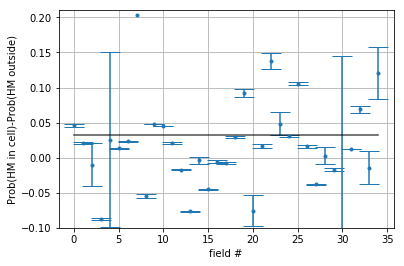

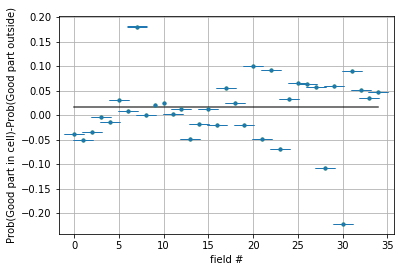

In [94]:

figure()
pin = pars[:,1]/pars[:,1:3].sum(axis=1)
pout = pars[:,3]/pars[:,3:5].sum(axis=1)
#plot(pars[:,0],pin-pout,'.')
errorbar(pars[:,0],pin-pout,epars[:,1]*2,fmt='.',capsize=10)
sel = isfinite(epars[:,1])
wy = epars[sel,1]
pin = pin[sel]
pout = pout[sel]
me = (pin/(wy)**2-pout/(wy)**2).sum()/(1./wy**2).sum()
stem = sqrt(1./(1./wy**2).sum())
plot(arange(35),arange(35)*0+me,'k-',alpha=0.7)
fill_between(arange(35),arange(35)*0+me-2*stem,arange(35)*0+me+2*stem)
print(me,stem)
xlabel("field #")
ylabel("Prob(HM in cell)-Prob(HM outside)")
ylim(-.1,.21)
#plot(pars[:,0],pars[:,3]/pars[:,3:5].sum(axis=1),'.')
grid()
figure()

pin = pars[:,5]/pars[:,5:7].sum(axis=1)
pout = pars[:,7]/pars[:,7:9].sum(axis=1)
#plot(pars[:,0],pin-pout,'.')
wy = epars[:,2]
errorbar(pars[:,0],pin-pout,wy*2,fmt='.',capsize=10)
sel = isfinite(epars[:,2])
wy = wy[sel]
pin = pin[sel]
pout = pout[sel]
me = (pin/(wy)**2-pout/(wy)**2).sum()/(1./wy**2).sum()
stem = sqrt(1./(1./wy**2).sum())
print(me,stem)
plot(arange(35),arange(35)*0+me,'k-',alpha=0.7)
fill_between(arange(35),arange(35)*0+me-2*stem,arange(35)*0+me+2*stem)

plot(pars[:,0],pars[:,5]/pars[:,5:7].sum(axis=1)-pars[:,7]/pars[:,7:9].sum(axis=1),'C2.')
xlabel("field #")
ylabel("Prob(Good part in cell)-Prob(Good part outside)")
grid()
#plot(pars[:,0],pars[:,3]/pars[:,3:5].sum(axis=1),'.')

In [104]:
parsC = []
eparsC = []

for icell in permutation(arange(len(maskfiles))):
    s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
    yt = abs((dgps[:,3]-dgps[:,5])/s1)
    xt = 1.0*Des[:,0]
    sel = (xt>0)*(abs(yt)<20)
    xt[~sel] = 0
    yt[~sel] = 0
    xt[sel] = log10(xt[sel])
    yt[sel] = yt[sel] #log10(yt[sel])
    sel = (yt>3.0)#*(Des[:,0]<.50e-2)
    # Selection by gaussian distance 2G = 3
    sel = (yt>3.0)*(posT[:,-1]==icell)*(posT[:,0]<512)
    # Selection by movility
    sel = (log10(Des[:,0])< (-2.5))*(posT[:,-1]==icell)*(posT[:,0]<512)
    # Selection in cell
    sel = (posT[:,-1]==icell)*(posT[:,0]<512)
    timsk = imsk[sel]

    cc0 = log10(Des[sel,0]*1)
    cc1 = 1.0/(1+exp(-(yt[sel]-2.5)*10))
    
    selinc = (timsk == 1)*(cc1>0.5)
    selinc2 = (timsk == 0)*(cc1>0.5)
    # Color by movility and good particle
    cc = cc0
    mv = ((cc[selinc]> (-2.5)).sum(),(cc[selinc]< (-2.5)).sum())
    mvo = ((cc[selinc2]> (-2.5)).sum(),(cc[selinc2]< (-2.5)).sum())
    emv = (sqrt(mv[0]*mv[1]/(mv[0]*mv[1])**3),sqrt(mvo[0]*mvo[1]/(mvo[0]*mvo[1])**3))
    

    selinc = (timsk == 1)*(cc0> (-2.5))
    selinc2 = (timsk == 0)*(cc0>(-2.5))
    # Color by 2G
    cc = cc1
    g2 = ((cc[selinc]>0.5).sum(),(cc[selinc]<0.5).sum())
    g2o = ((cc[selinc2]>0.5).sum(),(cc[selinc2]<0.5).sum())
    eg2 = (sqrt(g2[0]*g2[1]/(g2[0]*g2[1])**3),sqrt(g2o[0]*g2o[1]/(g2o[0]*g2o[1])**3))
    
    parsC.append(concatenate(([icell],mv,mvo,g2,g2o)))    
    eparsC.append(concatenate(([icell],emv,eg2)))

parsC = array(parsC)
eparsC = array(eparsC)

/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars
/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


-0.03815724373295033 0.015629651983784288 -0.03384570712031347 0.015629651983784288
0.020722888918282906 0.014063649690806033


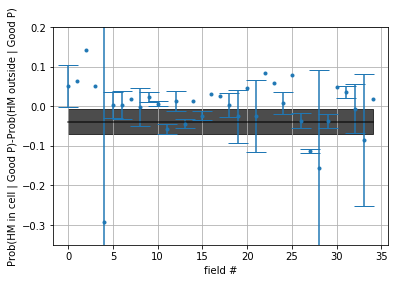

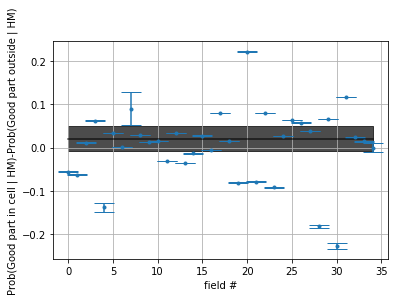

In [118]:
figure()
pin = parsC[:,1]/parsC[:,1:3].sum(axis=1)
pout = parsC[:,3]/parsC[:,3:5].sum(axis=1)
wy = eparsC[:,1]

#plot(pars[:,0],pin-pout,'.')
errorbar(parsC[:,0],pin-pout,wy,fmt='.',capsize=10)
sel = isfinite(wy)*isfinite(pin-pout)
wy = wy[sel]
pin = pin[sel]
pout = pout[sel]
me = (pin/(wy)**2-pout/(wy)**2).sum()/(1./wy**2).sum()
stem = sqrt(1./(1./wy**2).sum())
stem2 = std(pin-pout)/sqrt(len(pin))
stem = max(stem,stem2)
plot(arange(35),arange(35)*0+me,'k-',alpha=0.7)
fill_between(arange(35),arange(35)*0+me-2*stem,arange(35)*0+me+2*stem,color='k',alpha=0.7)
print(me,stem, mean(pin-pout),stem2)
xlabel("field #")
ylabel("Prob(HM in cell | Good P)-Prob(HM outside | Good P)")
ylim(-.35,.2)
#plot(pars[:,0],pars[:,3]/pars[:,3:5].sum(axis=1),'.')
grid()
figure()

pin = parsC[:,5]/parsC[:,5:7].sum(axis=1)
pout = parsC[:,7]/parsC[:,7:9].sum(axis=1)
#plot(pars[:,0],pin-pout,'.')
wy = eparsC[:,2]
errorbar(parsC[:,0],pin-pout,wy*2,fmt='.',capsize=10)
sel = isfinite(wy)
wy = wy[sel]
pin = pin[sel]
pout = pout[sel]
me = (pin/(wy)**2-pout/(wy)**2).sum()/(1./wy**2).sum()
stem = sqrt(1./(1./wy**2).sum())
stem2 = std(pin-pout)/sqrt(len(pin))
stem = max(stem,stem2)
print(me,stem)
plot(arange(35),arange(35)*0+me,'k-',alpha=0.7)
fill_between(arange(35),arange(35)*0+me-2*stem,arange(35)*0+me+2*stem,color='k',alpha=0.7)

#plot(pars[:,0],pars[:,5]/pars[:,5:7].sum(axis=1)-pars[:,7]/pars[:,7:9].sum(axis=1),'C2.')
xlabel("field #")
ylabel("Prob(Good part in cell | HM)-Prob(Good part outside | HM)")
grid()
#plot(pars[:,0],pars[:,3]/pars[:,3:5].sum(axis=1),'.')